# 6 Algos used are:-
1. RandomForest
2. SVM
3. ANN
4. AdaBoost
5. Gradient Boost
6. XgBoost 

Ensemble technique added

If you like it , please upvote & fork it. Keep learning , Keep Sharing:-)
(Wait for more intresting insights like ensemble techniques, proper functions.)


In [24]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [25]:
df_train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [26]:
df_test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [27]:
# Copying original dataset.
df=df_train

In [28]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
pd.isnull(df).sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [31]:
df.columns[df.isnull().any()] # Missing values.

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [32]:
df.iloc[:,0:60].isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [33]:
a=df.columns[df.isnull().any()]
a

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [34]:
a=list(a)
a

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [35]:
r,c=df.shape
r,c

(1460, 81)

In [36]:
missing_df=df[a]
missing_df

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [37]:
missing_df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [38]:
r1,c1=missing_df.shape
r1,c1

(1460, 19)

In [39]:
missing_df.isna()


,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1456,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1457,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1458,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True


In [40]:
missing_df.isna().sum()*100/r1
# miss_per_df.sum()*100/r1

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

## Dropping columns with missing values >= 20%

In [41]:
# Dropping columns with >=20% missing data
missing_data_20=missing_df.isna().sum()*100/r1>=20
missing_data_20

LotFrontage     False
Alley            True
MasVnrType      False
MasVnrArea      False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
Electrical      False
FireplaceQu      True
GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageQual      False
GarageCond      False
PoolQC           True
Fence            True
MiscFeature      True
dtype: bool

In [42]:
type(missing_data_20)

pandas.core.series.Series

In [43]:
missing_data_20.values

array([False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True])

In [44]:
dropping=[]
for i in range(c1):
    if missing_data_20.values[i]==True:
        dropping.append(missing_data_20.index[i])
dropping        

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [45]:
df_updated=df.drop(columns=dropping,axis=1)
df_updated

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [46]:
c_test=df_test
c_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Preprocess Test data

In [47]:
c_test=c_test.drop(columns=dropping,axis=1)
c_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


### 5 Columns dropped from train and test data

## Filling missing values.

In [48]:
y=df_updated.iloc[:,[-1]]
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [49]:
x=df_updated.iloc[:,:-1]
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [50]:
categorical_col=list(x.columns)
categorical_col

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3Ssn

In [51]:
x.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [52]:
s='LotFrontage LotArea MasVnrArea BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF GrLivArea GarageYrBlt GarageCars GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal MoSold YrSold'
non_categorical_col=s.split()

In [53]:
non_categorical_col

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [54]:
x.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [55]:
x['LowQualFinSF'].unique()

array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
       515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384])

In [56]:
x['GrLivArea'].nunique()

861

In [57]:
x['BsmtFullBath'].unique()

array([1, 0, 2, 3])

In [58]:
x['BsmtHalfBath'].unique()

array([0, 1, 2])

In [59]:
x['FullBath'].unique()

array([2, 1, 3, 0])

In [60]:
x['HalfBath'].unique()

array([1, 0, 2])

In [61]:
x['BedroomAbvGr'].unique()

array([3, 4, 1, 2, 0, 5, 6, 8])

In [62]:
x['KitchenAbvGr'].nunique(),x['KitchenAbvGr'].unique()

(4, array([1, 2, 3, 0]))

In [63]:
x['TotRmsAbvGrd'].nunique(),x['TotRmsAbvGrd'].unique()

(12, array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14]))

In [64]:
x['Fireplaces'].unique()

array([0, 1, 2, 3])

1. Which columns with missing values are categorical and Non-Categorical
2. From describe function, we get mean and 50% i.e. median or mode?. What is left, rightskweness? (Use of mean >,<,= median effect)
3. Visualize data for insights.
4. Some columns give same meaning. See values in those columns as well(eg.GarageQual vs GarageCond.)
5. Some categorical vars have more rank/preference lik excellent, avg. How to handel these datas.
6. If onehot encoding applied then cols make inc. Is it good or any alternative
7. Feature selection

Some columns have missing values. Fbefore visualizing data, i am using mean, mode operation as of now. Try other methods.

In [65]:
x.columns.get_loc('ExterQual')

26

In [66]:
x['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [67]:
missing_rest=list(missing_data_20.index)
(missing_rest)

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [68]:
dropping

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [69]:
missing_rest=list(set(missing_rest).difference(dropping))

In [70]:
missing_rest=df.loc[:, missing_rest] 
missing_rest

,LotFrontage,GarageQual,BsmtFinType2,MasVnrType,BsmtFinType1,BsmtExposure,GarageYrBlt,MasVnrArea,BsmtCond,GarageCond,GarageFinish,BsmtQual,Electrical,GarageType
0,65.0,TA,Unf,BrkFace,GLQ,No,2003.0,196.0,TA,TA,RFn,Gd,SBrkr,Attchd
1,80.0,TA,Unf,None,ALQ,Gd,1976.0,0.0,TA,TA,RFn,Gd,SBrkr,Attchd
2,68.0,TA,Unf,BrkFace,GLQ,Mn,2001.0,162.0,TA,TA,RFn,Gd,SBrkr,Attchd
3,60.0,TA,Unf,None,ALQ,No,1998.0,0.0,Gd,TA,Unf,TA,SBrkr,Detchd
4,84.0,TA,Unf,BrkFace,GLQ,Av,2000.0,350.0,TA,TA,RFn,Gd,SBrkr,Attchd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,TA,Unf,None,Unf,No,1999.0,0.0,TA,TA,RFn,Gd,SBrkr,Attchd
1456,85.0,TA,Rec,Stone,ALQ,No,1978.0,119.0,TA,TA,Unf,Gd,SBrkr,Attchd
1457,66.0,TA,Unf,None,GLQ,No,1941.0,0.0,Gd,TA,RFn,TA,SBrkr,Attchd
1458,68.0,TA,Rec,None,GLQ,Mn,1950.0,0.0,TA,TA,Unf,TA,FuseA,Attchd


In [71]:
missing_rest.describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


1. Std. ,variance use in eda. WHat does high and low value signify?
2. Data Wragling


In [72]:
# mean and mode is same for GarageYrBlt and LotFRONTage. SO filling them by mean. THe data seems normally distributed

mean and mode is same for GarageYrBlt and LotFRONTage. SO filling them by mean. THe data seems normally distributed

GarageYrBlt	,LotFrontage have mean and 50% almost same.   But LotFron has min and max diff very large.  Maybe outlier. Need to visualize data for this column.   
MasVnrArea haas 50% mark as 0.So most of data is 0.

In [73]:
import matplotlib.pyplot as plt

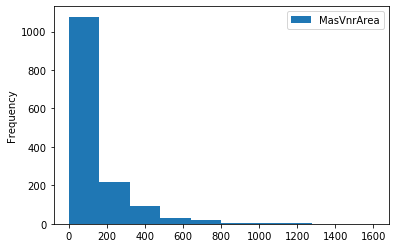

In [74]:
b=pd.DataFrame(missing_rest['MasVnrArea'])                
b.plot(kind='hist')
# Hence filling this volumn by zero.Better to drop it.No meaning of 0 sq. feet

In [75]:
missing_rest['Electrical'].value_counts()
# 1334/1460 = 91%------------                 Imbalanced dataset

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [76]:
missing_rest['BsmtFinType2'].value_counts()
# 1256/1460= 86%

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [77]:
missing_rest['BsmtQual'].value_counts()
# 1423

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [78]:
missing_rest['BsmtCond'].value_counts()
# 1311/1460 =

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [79]:
missing_rest['GarageType'].value_counts()
# 1379

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [80]:
missing_rest['BsmtFinType1'].value_counts()
# 1423

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [81]:
missing_rest['GarageQual'].value_counts()
# 1311/1460=

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [82]:
missing_rest['GarageFinish'].value_counts()
# 1379

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [83]:
missing_rest['MasVnrType'].value_counts()
# 1452

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [84]:
missing_rest['BsmtExposure'].value_counts()
# 1422

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [85]:
missing_rest['GarageCond'].value_counts()
# 1326/1460= 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

## Imputer

In [86]:
from sklearn.impute import SimpleImputer


In [87]:
mean_imputer=SimpleImputer(missing_values=np.nan, strategy='mean')


In [88]:

aa=missing_rest.loc[:,['GarageYrBlt','LotFrontage']]
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageYrBlt  1379 non-null   float64
 1   LotFrontage  1201 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [89]:
mean_imputer.fit(aa)
aa = mean_imputer.transform(aa)

## Fitting for test data also

In [90]:
c_test.loc[:,['GarageYrBlt','LotFrontage']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageYrBlt  1381 non-null   float64
 1   LotFrontage  1232 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [91]:
c_test1=c_test
c_test1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [92]:
c_test1.loc[:,['GarageYrBlt','LotFrontage']]=mean_imputer.transform(c_test1.loc[:,['GarageYrBlt','LotFrontage']])

In [93]:
c_test1.loc[:,['GarageYrBlt','LotFrontage']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageYrBlt  1459 non-null   float64
 1   LotFrontage  1459 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [94]:
c_test=c_test1
c_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [95]:
aa=pd.DataFrame(aa)
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1460 non-null   float64
 1   1       1460 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [96]:
aa.columns=['GarageYrBlt','LotFrontage']
aa

,GarageYrBlt,LotFrontage
0,2003.0,65.0
1,1976.0,80.0
2,2001.0,68.0
3,1998.0,60.0
4,2000.0,84.0
...,...,...
1455,1999.0,62.0
1456,1978.0,85.0
1457,1941.0,66.0
1458,1950.0,68.0


In [97]:
mean_cols='GarageQual Electrical BsmtFinType2 BsmtCond GarageCond'
mean_cols=list(mean_cols.split())
mean_cols
# Some categorical, hence

['GarageQual', 'Electrical', 'BsmtFinType2', 'BsmtCond', 'GarageCond']

Dropping column: 
1. MasVnrType as mostly filled by 'None' type.
2. GarageFinish also dropping as **Garage qual** and **Garage Condn**  there
3. BsmtQual as **BsmtCond** there which evaluates general condition of basement.
4. BsmtFinType1 as BsmtFinType2 is there. Don't know how to handle if modes are same for 2 categories

In [98]:
missing_rest=missing_rest.drop(columns=['MasVnrType','GarageFinish','BsmtQual','MasVnrArea','BsmtFinType1'])
missing_rest

,LotFrontage,GarageQual,BsmtFinType2,BsmtExposure,GarageYrBlt,BsmtCond,GarageCond,Electrical,GarageType
0,65.0,TA,Unf,No,2003.0,TA,TA,SBrkr,Attchd
1,80.0,TA,Unf,Gd,1976.0,TA,TA,SBrkr,Attchd
2,68.0,TA,Unf,Mn,2001.0,TA,TA,SBrkr,Attchd
3,60.0,TA,Unf,No,1998.0,Gd,TA,SBrkr,Detchd
4,84.0,TA,Unf,Av,2000.0,TA,TA,SBrkr,Attchd
...,...,...,...,...,...,...,...,...,...
1455,62.0,TA,Unf,No,1999.0,TA,TA,SBrkr,Attchd
1456,85.0,TA,Rec,No,1978.0,TA,TA,SBrkr,Attchd
1457,66.0,TA,Unf,No,1941.0,Gd,TA,SBrkr,Attchd
1458,68.0,TA,Rec,Mn,1950.0,TA,TA,FuseA,Attchd


## Test data

In [99]:
c_test1=c_test1.drop(columns=['MasVnrType','GarageFinish','BsmtQual','MasVnrArea','BsmtFinType1'])
c_test1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [100]:
c_test=c_test1

In [101]:
# GarageType filled by mode as 63% vs 29% repeating.See alternative method...
# BsmtExposer filled by mode as 68% vs 15%

In [102]:
mode_imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')


In [103]:
missing_rest

,LotFrontage,GarageQual,BsmtFinType2,BsmtExposure,GarageYrBlt,BsmtCond,GarageCond,Electrical,GarageType
0,65.0,TA,Unf,No,2003.0,TA,TA,SBrkr,Attchd
1,80.0,TA,Unf,Gd,1976.0,TA,TA,SBrkr,Attchd
2,68.0,TA,Unf,Mn,2001.0,TA,TA,SBrkr,Attchd
3,60.0,TA,Unf,No,1998.0,Gd,TA,SBrkr,Detchd
4,84.0,TA,Unf,Av,2000.0,TA,TA,SBrkr,Attchd
...,...,...,...,...,...,...,...,...,...
1455,62.0,TA,Unf,No,1999.0,TA,TA,SBrkr,Attchd
1456,85.0,TA,Rec,No,1978.0,TA,TA,SBrkr,Attchd
1457,66.0,TA,Unf,No,1941.0,Gd,TA,SBrkr,Attchd
1458,68.0,TA,Rec,Mn,1950.0,TA,TA,FuseA,Attchd


In [104]:
a1=missing_rest.loc[:,['GarageType','BsmtExposure']]
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageType    1379 non-null   object
 1   BsmtExposure  1422 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


In [105]:
mode_imputer.fit(a1)
a11 = mode_imputer.transform(a1)


## Test data

In [106]:
c_test1.loc[:,['GarageType','BsmtExposure']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageType    1383 non-null   object
 1   BsmtExposure  1415 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


In [107]:
c_test1.loc[:,['GarageType','BsmtExposure']]=mode_imputer.transform(c_test1.loc[:,['GarageType','BsmtExposure']])

In [108]:
c_test1.loc[:,['GarageType','BsmtExposure']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageType    1459 non-null   object
 1   BsmtExposure  1459 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


In [109]:
c_test=c_test1

In [110]:
a1=pd.DataFrame(a11,columns=a1.columns)
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageType    1460 non-null   object
 1   BsmtExposure  1460 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


## All are categorical.NO need of onehot as ranking needed

In [111]:
missing_rest2=missing_rest[mean_cols]

In [112]:
missing_rest2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageQual    1379 non-null   object
 1   Electrical    1459 non-null   object
 2   BsmtFinType2  1422 non-null   object
 3   BsmtCond      1423 non-null   object
 4   GarageCond    1379 non-null   object
dtypes: object(5)
memory usage: 57.2+ KB


In [113]:
missing_rest2

,GarageQual,Electrical,BsmtFinType2,BsmtCond,GarageCond
0,TA,SBrkr,Unf,TA,TA
1,TA,SBrkr,Unf,TA,TA
2,TA,SBrkr,Unf,TA,TA
3,TA,SBrkr,Unf,Gd,TA
4,TA,SBrkr,Unf,TA,TA
...,...,...,...,...,...
1455,TA,SBrkr,Unf,TA,TA
1456,TA,SBrkr,Rec,TA,TA
1457,TA,SBrkr,Unf,Gd,TA
1458,TA,FuseA,Rec,TA,TA


## As of now simply encoding. Later try giving more rank to excellent  Then see o/p. Similarly assign less rank to excell.

In [114]:
missing_rest2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageQual    1379 non-null   object
 1   Electrical    1459 non-null   object
 2   BsmtFinType2  1422 non-null   object
 3   BsmtCond      1423 non-null   object
 4   GarageCond    1379 non-null   object
dtypes: object(5)
memory usage: 57.2+ KB


In [115]:
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer.fit(missing_rest2)
missing_rest2 = imputer.transform(missing_rest2)

In [116]:
missing_rest2=pd.DataFrame(missing_rest2)

In [117]:
missing_rest2

,0,1,2,3,4
0,TA,SBrkr,Unf,TA,TA
1,TA,SBrkr,Unf,TA,TA
2,TA,SBrkr,Unf,TA,TA
3,TA,SBrkr,Unf,Gd,TA
4,TA,SBrkr,Unf,TA,TA
...,...,...,...,...,...
1455,TA,SBrkr,Unf,TA,TA
1456,TA,SBrkr,Rec,TA,TA
1457,TA,SBrkr,Unf,Gd,TA
1458,TA,FuseA,Rec,TA,TA


## FOr test data

In [118]:
c_test1.loc[:,mean_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageQual    1381 non-null   object
 1   Electrical    1459 non-null   object
 2   BsmtFinType2  1417 non-null   object
 3   BsmtCond      1414 non-null   object
 4   GarageCond    1381 non-null   object
dtypes: object(5)
memory usage: 57.1+ KB


In [119]:
c_test1.loc[:,mean_cols] = imputer.transform(c_test1.loc[:,mean_cols])

In [120]:
c_test1.loc[:,mean_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageQual    1459 non-null   object
 1   Electrical    1459 non-null   object
 2   BsmtFinType2  1459 non-null   object
 3   BsmtCond      1459 non-null   object
 4   GarageCond    1459 non-null   object
dtypes: object(5)
memory usage: 57.1+ KB


In [121]:
c_test=c_test1

In [122]:
from sklearn.preprocessing import LabelEncoder


In [123]:
missing_rest2.dtypes

0    object
1    object
2    object
3    object
4    object
dtype: object

In [124]:
missing_rest2.columns=mean_cols

In [125]:
missing_rest2


,GarageQual,Electrical,BsmtFinType2,BsmtCond,GarageCond
0,TA,SBrkr,Unf,TA,TA
1,TA,SBrkr,Unf,TA,TA
2,TA,SBrkr,Unf,TA,TA
3,TA,SBrkr,Unf,Gd,TA
4,TA,SBrkr,Unf,TA,TA
...,...,...,...,...,...
1455,TA,SBrkr,Unf,TA,TA
1456,TA,SBrkr,Rec,TA,TA
1457,TA,SBrkr,Unf,Gd,TA
1458,TA,FuseA,Rec,TA,TA


In [126]:
a1

,GarageType,BsmtExposure
0,Attchd,No
1,Attchd,Gd
2,Attchd,Mn
3,Detchd,No
4,Attchd,Av
...,...,...
1455,Attchd,No
1456,Attchd,No
1457,Attchd,No
1458,Attchd,Mn


In [127]:
aa

,GarageYrBlt,LotFrontage
0,2003.0,65.0
1,1976.0,80.0
2,2001.0,68.0
3,1998.0,60.0
4,2000.0,84.0
...,...,...
1455,1999.0,62.0
1456,1978.0,85.0
1457,1941.0,66.0
1458,1950.0,68.0


In [128]:
missing_rest2

,GarageQual,Electrical,BsmtFinType2,BsmtCond,GarageCond
0,TA,SBrkr,Unf,TA,TA
1,TA,SBrkr,Unf,TA,TA
2,TA,SBrkr,Unf,TA,TA
3,TA,SBrkr,Unf,Gd,TA
4,TA,SBrkr,Unf,TA,TA
...,...,...,...,...,...
1455,TA,SBrkr,Unf,TA,TA
1456,TA,SBrkr,Rec,TA,TA
1457,TA,SBrkr,Unf,Gd,TA
1458,TA,FuseA,Rec,TA,TA


In [129]:
df_index = pd.merge(a1, aa, right_index=True, left_index=True)
df_index

,GarageType,BsmtExposure,GarageYrBlt,LotFrontage
0,Attchd,No,2003.0,65.0
1,Attchd,Gd,1976.0,80.0
2,Attchd,Mn,2001.0,68.0
3,Detchd,No,1998.0,60.0
4,Attchd,Av,2000.0,84.0
...,...,...,...,...
1455,Attchd,No,1999.0,62.0
1456,Attchd,No,1978.0,85.0
1457,Attchd,No,1941.0,66.0
1458,Attchd,Mn,1950.0,68.0


In [130]:
df_index = pd.merge(df_index, missing_rest2, right_index=True, left_index=True)


In [131]:
df_index

,GarageType,BsmtExposure,GarageYrBlt,LotFrontage,GarageQual,Electrical,BsmtFinType2,BsmtCond,GarageCond
0,Attchd,No,2003.0,65.0,TA,SBrkr,Unf,TA,TA
1,Attchd,Gd,1976.0,80.0,TA,SBrkr,Unf,TA,TA
2,Attchd,Mn,2001.0,68.0,TA,SBrkr,Unf,TA,TA
3,Detchd,No,1998.0,60.0,TA,SBrkr,Unf,Gd,TA
4,Attchd,Av,2000.0,84.0,TA,SBrkr,Unf,TA,TA
...,...,...,...,...,...,...,...,...,...
1455,Attchd,No,1999.0,62.0,TA,SBrkr,Unf,TA,TA
1456,Attchd,No,1978.0,85.0,TA,SBrkr,Rec,TA,TA
1457,Attchd,No,1941.0,66.0,TA,SBrkr,Unf,Gd,TA
1458,Attchd,Mn,1950.0,68.0,TA,FuseA,Rec,TA,TA


In [132]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1460 non-null   object 
 1   BsmtExposure  1460 non-null   object 
 2   GarageYrBlt   1460 non-null   float64
 3   LotFrontage   1460 non-null   float64
 4   GarageQual    1460 non-null   object 
 5   Electrical    1460 non-null   object 
 6   BsmtFinType2  1460 non-null   object 
 7   BsmtCond      1460 non-null   object 
 8   GarageCond    1460 non-null   object 
dtypes: float64(2), object(7)
memory usage: 102.8+ KB


In [133]:
zz=x
zz

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,112,0,0,0,0,4,2010,WD,Normal


In [134]:
remove='GarageType BsmtExposure GarageQual BsmtCond GarageYrBlt MasVnrArea GarageFinish BsmtFinType2 GarageCond Electrical BsmtQual MasVnrType LotFrontage BsmtFinType1'

In [135]:
remove=remove.split()

In [136]:
remove

['GarageType',
 'BsmtExposure',
 'GarageQual',
 'BsmtCond',
 'GarageYrBlt',
 'MasVnrArea',
 'GarageFinish',
 'BsmtFinType2',
 'GarageCond',
 'Electrical',
 'BsmtQual',
 'MasVnrType',
 'LotFrontage',
 'BsmtFinType1']

In [137]:
x=x.drop(columns=remove)
x

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [138]:
x = pd.concat([x, df_index], axis=1, sort=False)

x

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition,GarageType,BsmtExposure,GarageYrBlt,LotFrontage,GarageQual,Electrical,BsmtFinType2,BsmtCond,GarageCond
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,Attchd,No,2003.0,65.0,TA,SBrkr,Unf,TA,TA
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Normal,Attchd,Gd,1976.0,80.0,TA,SBrkr,Unf,TA,TA
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Normal,Attchd,Mn,2001.0,68.0,TA,SBrkr,Unf,TA,TA
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Abnorml,Detchd,No,1998.0,60.0,TA,SBrkr,Unf,Gd,TA
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Normal,Attchd,Av,2000.0,84.0,TA,SBrkr,Unf,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,Attchd,No,1999.0,62.0,TA,SBrkr,Unf,TA,TA
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,Attchd,No,1978.0,85.0,TA,SBrkr,Rec,TA,TA
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,Attchd,No,1941.0,66.0,TA,SBrkr,Unf,Gd,TA
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,Attchd,Mn,1950.0,68.0,TA,FuseA,Rec,TA,TA


# .............DataFrame is cleaned...........But Converting to categorical vars is left...................

In [139]:
c_test1_missing_values=c_test1.columns[c_test1.isnull().any()] # Missing values in test data.
c_test1_missing_values=list(c_test1_missing_values)
c_test1_missing_values

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [140]:
df_test_c_missing=c_test1.loc[:,c_test1_missing_values]
df_test_c_missing

,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,GarageArea,SaleType
0,RH,AllPub,VinylSd,VinylSd,468.0,144.0,270.0,882.0,0.0,0.0,TA,Typ,1.0,730.0,WD
1,RL,AllPub,Wd Sdng,Wd Sdng,923.0,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,1.0,312.0,WD
2,RL,AllPub,VinylSd,VinylSd,791.0,0.0,137.0,928.0,0.0,0.0,TA,Typ,2.0,482.0,WD
3,RL,AllPub,VinylSd,VinylSd,602.0,0.0,324.0,926.0,0.0,0.0,Gd,Typ,2.0,470.0,WD
4,RL,AllPub,HdBoard,HdBoard,263.0,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,2.0,506.0,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,AllPub,CemntBd,CmentBd,0.0,0.0,546.0,546.0,0.0,0.0,TA,Typ,0.0,0.0,WD
1455,RM,AllPub,CemntBd,CmentBd,252.0,0.0,294.0,546.0,0.0,0.0,TA,Typ,1.0,286.0,WD
1456,RL,AllPub,VinylSd,VinylSd,1224.0,0.0,0.0,1224.0,1.0,0.0,TA,Typ,2.0,576.0,WD
1457,RL,AllPub,HdBoard,Wd Shng,337.0,0.0,575.0,912.0,0.0,1.0,TA,Typ,0.0,0.0,WD


In [141]:
c_test1.loc[:,c_test1_missing_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   Utilities     1457 non-null   object 
 2   Exterior1st   1458 non-null   object 
 3   Exterior2nd   1458 non-null   object 
 4   BsmtFinSF1    1458 non-null   float64
 5   BsmtFinSF2    1458 non-null   float64
 6   BsmtUnfSF     1458 non-null   float64
 7   TotalBsmtSF   1458 non-null   float64
 8   BsmtFullBath  1457 non-null   float64
 9   BsmtHalfBath  1457 non-null   float64
 10  KitchenQual   1458 non-null   object 
 11  Functional    1457 non-null   object 
 12  GarageCars    1458 non-null   float64
 13  GarageArea    1458 non-null   float64
 14  SaleType      1458 non-null   object 
dtypes: float64(8), object(7)
memory usage: 171.1+ KB


In [142]:
c_missing=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

c_missing.fit(x.loc[:,c_test1_missing_values])
c_test1.loc[:,c_test1_missing_values] = c_missing.transform(c_test1.loc[:,c_test1_missing_values])

In [143]:
c_test1.columns[c_test1.isnull().any()]


Index([], dtype='object')

In [144]:
c_test1.loc[:,c_test1_missing_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1459 non-null   object 
 1   Utilities     1459 non-null   object 
 2   Exterior1st   1459 non-null   object 
 3   Exterior2nd   1459 non-null   object 
 4   BsmtFinSF1    1459 non-null   float64
 5   BsmtFinSF2    1459 non-null   float64
 6   BsmtUnfSF     1459 non-null   float64
 7   TotalBsmtSF   1459 non-null   float64
 8   BsmtFullBath  1459 non-null   float64
 9   BsmtHalfBath  1459 non-null   float64
 10  KitchenQual   1459 non-null   object 
 11  Functional    1459 non-null   object 
 12  GarageCars    1459 non-null   float64
 13  GarageArea    1459 non-null   float64
 14  SaleType      1459 non-null   object 
dtypes: float64(8), object(7)
memory usage: 171.1+ KB


In [145]:
chalo=c_test1.loc[:,['Exterior2nd','Utilities','Exterior1st',
 'SaleType',
 'KitchenQual',
 'Functional',
 'MSZoning']]
chalo

,Exterior2nd,Utilities,Exterior1st,SaleType,KitchenQual,Functional,MSZoning
0,VinylSd,AllPub,VinylSd,WD,TA,Typ,RH
1,Wd Sdng,AllPub,Wd Sdng,WD,Gd,Typ,RL
2,VinylSd,AllPub,VinylSd,WD,TA,Typ,RL
3,VinylSd,AllPub,VinylSd,WD,Gd,Typ,RL
4,HdBoard,AllPub,HdBoard,WD,Gd,Typ,RL
...,...,...,...,...,...,...,...
1454,CmentBd,AllPub,CemntBd,WD,TA,Typ,RM
1455,CmentBd,AllPub,CemntBd,WD,TA,Typ,RM
1456,VinylSd,AllPub,VinylSd,WD,TA,Typ,RL
1457,Wd Shng,AllPub,HdBoard,WD,TA,Typ,RL


In [146]:
set(chalo.columns)

{'Exterior1st',
 'Exterior2nd',
 'Functional',
 'KitchenQual',
 'MSZoning',
 'SaleType',
 'Utilities'}

In [147]:
c_test1['Foundation'].unique()
# 16, 10 ,5, 5, 25, 8, 6, 6, 9

array(['CBlock', 'PConc', 'BrkTil', 'Stone', 'Slab', 'Wood'], dtype=object)

In [148]:
count=0
for i in range(0,1459):
    if type(chalo['Utilities'][i])==str:
        continue
#         print('hi')
    else:
         print(i,(chalo['Utilities'][i]),(chalo['Utilities'][i-1]))
#          count+=1
print(count)
#    

0


In [149]:
# Exterior 2nd --691---13.0
chalo.Exterior2nd.value_counts()
chalo['Exterior2nd'][691]='VinylSd'
chalo['Exterior2nd'][691]

'VinylSd'

In [150]:
# Utilities
# 455 0.0 AllPub
# 485 0.0 AllPub
chalo.Utilities.value_counts()
chalo['Utilities'][455]='AllPub'
chalo['Utilities'][485]='AllPub'

chalo['Utilities'][455], chalo['Utilities'][485]

('AllPub', 'AllPub')

In [151]:
# Exterior1st
# 691 12.0 BrkFace
chalo.Exterior1st.value_counts()
chalo['Exterior1st'][691]='VinylSd'
chalo['Exterior1st'][691]

'VinylSd'

In [152]:
# SaleType 1029 noo (8.0, 'WD')
chalo.SaleType.value_counts()
chalo['SaleType'][1029]='WD'
chalo['SaleType'][1029]

'WD'

In [153]:
# KitchenQual 95 noo (3.0, 'TA')
chalo.KitchenQual.value_counts()
chalo['KitchenQual'][95]='TA'
chalo['KitchenQual'][95]

'TA'

In [154]:
# # Functional
# 756 noo (6.0, 'Typ')
# 1013 noo (6.0, 'Typ')
chalo.Functional.value_counts()
chalo['Functional'][756]='Typ'
chalo['Functional'][1013]='Typ'
chalo['Functional'][756],chalo['Functional'][1013]

('Typ', 'Typ')

In [155]:
# 
# 455 noo (3.0, 'RM')
# 756 noo (3.0, 'RM')
# 790 noo (3.0, 'RL')
# 1444 noo (3.0, 'RL')

chalo.MSZoning.value_counts()
chalo['MSZoning'][756]='RL'
chalo['MSZoning'][455]='RL'
chalo['MSZoning'][790]='RL'
chalo['MSZoning'][1444]='RL'

chalo['MSZoning'][756],chalo['MSZoning'][455],chalo['MSZoning'][790],chalo['MSZoning'][1444]

('RL', 'RL', 'RL', 'RL')

In [156]:
chalo_columns=[]

In [157]:
for i in chalo.columns:
    chalo_columns.append(i)
chalo_columns    

['Exterior2nd',
 'Utilities',
 'Exterior1st',
 'SaleType',
 'KitchenQual',
 'Functional',
 'MSZoning']

# Train data of these columns used for label encoding

In [158]:
x.loc[:,chalo_columns[0]]

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Shng
4       VinylSd
         ...   
1455    VinylSd
1456    Plywood
1457    CmentBd
1458    MetalSd
1459    HdBoard
Name: Exterior2nd, Length: 1460, dtype: object

In [159]:
x_copy=x.loc[:,chalo_columns]
x_copy

,Exterior2nd,Utilities,Exterior1st,SaleType,KitchenQual,Functional,MSZoning
0,VinylSd,AllPub,VinylSd,WD,Gd,Typ,RL
1,MetalSd,AllPub,MetalSd,WD,TA,Typ,RL
2,VinylSd,AllPub,VinylSd,WD,Gd,Typ,RL
3,Wd Shng,AllPub,Wd Sdng,WD,Gd,Typ,RL
4,VinylSd,AllPub,VinylSd,WD,Gd,Typ,RL
...,...,...,...,...,...,...,...
1455,VinylSd,AllPub,VinylSd,WD,TA,Typ,RL
1456,Plywood,AllPub,Plywood,WD,TA,Min1,RL
1457,CmentBd,AllPub,CemntBd,WD,Gd,Typ,RL
1458,MetalSd,AllPub,MetalSd,WD,Gd,Typ,RL


In [160]:
chalo

,Exterior2nd,Utilities,Exterior1st,SaleType,KitchenQual,Functional,MSZoning
0,VinylSd,AllPub,VinylSd,WD,TA,Typ,RH
1,Wd Sdng,AllPub,Wd Sdng,WD,Gd,Typ,RL
2,VinylSd,AllPub,VinylSd,WD,TA,Typ,RL
3,VinylSd,AllPub,VinylSd,WD,Gd,Typ,RL
4,HdBoard,AllPub,HdBoard,WD,Gd,Typ,RL
...,...,...,...,...,...,...,...
1454,CmentBd,AllPub,CemntBd,WD,TA,Typ,RM
1455,CmentBd,AllPub,CemntBd,WD,TA,Typ,RM
1456,VinylSd,AllPub,VinylSd,WD,TA,Typ,RL
1457,Wd Shng,AllPub,HdBoard,WD,TA,Typ,RL


In [161]:
chalo[chalo_columns[0]]

0       VinylSd
1       Wd Sdng
2       VinylSd
3       VinylSd
4       HdBoard
         ...   
1454    CmentBd
1455    CmentBd
1456    VinylSd
1457    Wd Shng
1458    HdBoard
Name: Exterior2nd, Length: 1459, dtype: object

In [162]:
def chalo_encoder(i):
    l=LabelEncoder()
    
    l.fit(x.loc[:,chalo_columns[i]])
    x.loc[:,chalo_columns[i]]=l.transform(x.loc[:,chalo_columns[i]])
    chalo[chalo_columns[i]]=l.transform(chalo[chalo_columns[i]])

## Label Encoding these

In [163]:
chalo

,Exterior2nd,Utilities,Exterior1st,SaleType,KitchenQual,Functional,MSZoning
0,VinylSd,AllPub,VinylSd,WD,TA,Typ,RH
1,Wd Sdng,AllPub,Wd Sdng,WD,Gd,Typ,RL
2,VinylSd,AllPub,VinylSd,WD,TA,Typ,RL
3,VinylSd,AllPub,VinylSd,WD,Gd,Typ,RL
4,HdBoard,AllPub,HdBoard,WD,Gd,Typ,RL
...,...,...,...,...,...,...,...
1454,CmentBd,AllPub,CemntBd,WD,TA,Typ,RM
1455,CmentBd,AllPub,CemntBd,WD,TA,Typ,RM
1456,VinylSd,AllPub,VinylSd,WD,TA,Typ,RL
1457,Wd Shng,AllPub,HdBoard,WD,TA,Typ,RL


In [164]:
c_test1=c_test1.drop(columns=chalo.columns)

In [165]:
c_test1 = pd.concat([c_test1, chalo], axis=1, sort=False)
c_test1

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MoSold,YrSold,SaleCondition,Exterior2nd,Utilities,Exterior1st,SaleType,KitchenQual,Functional,MSZoning
0,1461,20,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,6,2010,Normal,VinylSd,AllPub,VinylSd,WD,TA,Typ,RH
1,1462,20,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,...,6,2010,Normal,Wd Sdng,AllPub,Wd Sdng,WD,Gd,Typ,RL
2,1463,60,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,3,2010,Normal,VinylSd,AllPub,VinylSd,WD,TA,Typ,RL
3,1464,60,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,6,2010,Normal,VinylSd,AllPub,VinylSd,WD,Gd,Typ,RL
4,1465,120,43.0,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,...,1,2010,Normal,HdBoard,AllPub,HdBoard,WD,Gd,Typ,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,...,6,2006,Normal,CmentBd,AllPub,CemntBd,WD,TA,Typ,RM
1455,2916,160,21.0,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,...,4,2006,Abnorml,CmentBd,AllPub,CemntBd,WD,TA,Typ,RM
1456,2917,20,160.0,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,9,2006,Abnorml,VinylSd,AllPub,VinylSd,WD,TA,Typ,RL
1457,2918,85,62.0,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,7,2006,Normal,Wd Shng,AllPub,HdBoard,WD,TA,Typ,RL


In [166]:
c_test=c_test1

## After IMPUTER , now label encoding

In [167]:
num_cols = x._get_numeric_data().columns
num_cols,len(num_cols)

(Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt',
        'LotFrontage'],
       dtype='object'),
 36)

In [168]:
categorical=list(set(x.columns) - set(num_cols))
categorical,len(categorical)

(['MSZoning',
  'LandSlope',
  'Functional',
  'CentralAir',
  'PavedDrive',
  'GarageQual',
  'BsmtFinType2',
  'Exterior2nd',
  'Heating',
  'SaleCondition',
  'RoofStyle',
  'Utilities',
  'BsmtCond',
  'KitchenQual',
  'Electrical',
  'ExterQual',
  'HouseStyle',
  'Foundation',
  'Neighborhood',
  'GarageType',
  'HeatingQC',
  'LotConfig',
  'Condition2',
  'BldgType',
  'SaleType',
  'BsmtExposure',
  'ExterCond',
  'Exterior1st',
  'GarageCond',
  'LotShape',
  'Condition1',
  'Street',
  'RoofMatl',
  'LandContour'],
 34)

In [169]:
zz=x
zz

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition,GarageType,BsmtExposure,GarageYrBlt,LotFrontage,GarageQual,Electrical,BsmtFinType2,BsmtCond,GarageCond
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,Attchd,No,2003.0,65.0,TA,SBrkr,Unf,TA,TA
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Normal,Attchd,Gd,1976.0,80.0,TA,SBrkr,Unf,TA,TA
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Normal,Attchd,Mn,2001.0,68.0,TA,SBrkr,Unf,TA,TA
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Abnorml,Detchd,No,1998.0,60.0,TA,SBrkr,Unf,Gd,TA
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Normal,Attchd,Av,2000.0,84.0,TA,SBrkr,Unf,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,Attchd,No,1999.0,62.0,TA,SBrkr,Unf,TA,TA
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,Attchd,No,1978.0,85.0,TA,SBrkr,Rec,TA,TA
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,Attchd,No,1941.0,66.0,TA,SBrkr,Unf,Gd,TA
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,Attchd,Mn,1950.0,68.0,TA,FuseA,Rec,TA,TA


In [170]:

num_cols = zz._get_numeric_data().columns
len(num_cols)

36

## For test data

In [171]:
num_co = c_test1._get_numeric_data().columns
num_co

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [172]:
categorical_test=list(set(c_test1.columns) - set(num_co))
categorical_test,len(categorical_test)

(['MSZoning',
  'LandSlope',
  'Functional',
  'CentralAir',
  'PavedDrive',
  'GarageQual',
  'BsmtFinType2',
  'Exterior2nd',
  'Heating',
  'SaleCondition',
  'RoofStyle',
  'Utilities',
  'BsmtCond',
  'KitchenQual',
  'Electrical',
  'ExterQual',
  'HouseStyle',
  'Foundation',
  'Neighborhood',
  'GarageType',
  'HeatingQC',
  'LotConfig',
  'Condition2',
  'BldgType',
  'BsmtExposure',
  'SaleType',
  'ExterCond',
  'Exterior1st',
  'GarageCond',
  'LotShape',
  'Condition1',
  'Street',
  'RoofMatl',
  'LandContour'],
 34)

In [173]:
num_c = c_test1._get_numeric_data().columns
len(num_c)

36

In [174]:
num_cols = zz._get_numeric_data().columns
len(num_cols)
# BEFORE

36

In [175]:
num_cols = c_test1._get_numeric_data().columns
len(num_cols)
# BEFORE

36

# Label Encoder of Train and test:-


In [176]:
def lebel_enc(yoo):
    l1=LabelEncoder()
    
    l1.fit_transform(zz[yoo])
    zz[yoo]=l1.transform(zz[yoo])
    c_test1[yoo]=l1.transform(c_test1[yoo])


In [177]:
for i in categorical:
    lebel_enc(i)

In [178]:
num_cols = zz._get_numeric_data().columns
len(num_cols)
# AFter

70

In [179]:
num_cols = c_test1._get_numeric_data().columns
len(num_cols)
# AFter

70

In [180]:
x

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition,GarageType,BsmtExposure,GarageYrBlt,LotFrontage,GarageQual,Electrical,BsmtFinType2,BsmtCond,GarageCond
0,1,60,3,8450,1,3,3,0,4,0,...,4,1,3,2003.0,65.0,4,4,5,3,4
1,2,20,3,9600,1,3,3,0,2,0,...,4,1,1,1976.0,80.0,4,4,5,3,4
2,3,60,3,11250,1,0,3,0,4,0,...,4,1,2,2001.0,68.0,4,4,5,3,4
3,4,70,3,9550,1,0,3,0,0,0,...,0,5,3,1998.0,60.0,4,4,5,1,4
4,5,60,3,14260,1,0,3,0,2,0,...,4,1,0,2000.0,84.0,4,4,5,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,0,...,4,1,3,1999.0,62.0,4,4,5,3,4
1456,1457,20,3,13175,1,3,3,0,4,0,...,4,1,3,1978.0,85.0,4,4,4,3,4
1457,1458,70,3,9042,1,3,3,0,4,0,...,4,1,3,1941.0,66.0,4,4,5,1,4
1458,1459,20,3,9717,1,3,3,0,4,0,...,4,1,2,1950.0,68.0,4,0,4,3,4


# Simple label Encoding without rankings.
Scaling also not done

## Simply give all columns to algorithm

1. Multiple variable regression
2. SVM
3. Logistic Regreesion
4. Decision Tree
5. Random Forest


In [181]:
import seaborn as sns

# **<u> 1.Using Univariate Selection</u>**

In [182]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [183]:

bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best features

            Specs         Score
3         LotArea  1.011497e+07
56        MiscVal  6.253332e+06
34       2ndFlrSF  4.648841e+05
26     BsmtFinSF1  3.999851e+05
55       PoolArea  3.835642e+05
27     BsmtFinSF2  3.688827e+05
28      BsmtUnfSF  2.747512e+05
35   LowQualFinSF  2.448810e+05
36      GrLivArea  1.968501e+05
29    TotalBsmtSF  1.747065e+05
53      3SsnPorch  1.549360e+05
0              Id  1.548417e+05
54    ScreenPorch  1.366295e+05
50     WoodDeckSF  1.298338e+05
33       1stFlrSF  1.238098e+05
52  EnclosedPorch  9.888657e+04
48     GarageArea  9.618405e+04
51    OpenPorchSF  7.436257e+04
1      MSSubClass  1.928123e+04
64    LotFrontage  5.066301e+03
10   Neighborhood  2.194267e+03
13       BldgType  1.951478e+03
31      HeatingQC  1.483145e+03
61     GarageType  1.025247e+03
9       LandSlope  8.897938e+02
14     HouseStyle  8.128877e+02
22    Exterior2nd  8.086199e+02
5        LotShape  8.029729e+02
57         MoSold  7.429758e+02
21    Exterior1st  6.960259e+02


In [184]:
hi=featureScores.sort_values(by='Score',ascending=False).iloc[:30,[0]]
hi

,Specs
3,LotArea
56,MiscVal
34,2ndFlrSF
26,BsmtFinSF1
55,PoolArea
27,BsmtFinSF2
28,BsmtUnfSF
35,LowQualFinSF
36,GrLivArea
29,TotalBsmtSF


In [185]:
hii_selectBestK=hi['Specs'].to_list()

In [186]:
hii_selectBestK

['LotArea',
 'MiscVal',
 '2ndFlrSF',
 'BsmtFinSF1',
 'PoolArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotalBsmtSF',
 '3SsnPorch',
 'Id',
 'ScreenPorch',
 'WoodDeckSF',
 '1stFlrSF',
 'EnclosedPorch',
 'GarageArea',
 'OpenPorchSF',
 'MSSubClass',
 'LotFrontage',
 'Neighborhood',
 'BldgType',
 'HeatingQC',
 'GarageType',
 'LandSlope',
 'HouseStyle',
 'Exterior2nd',
 'LotShape',
 'MoSold',
 'Exterior1st']

In [187]:
select_bestK_columns=hii_selectBestK

In [188]:
x_select_bestk=x.loc[:,select_bestK_columns]

In [189]:
x_select_bestk

,LotArea,MiscVal,2ndFlrSF,BsmtFinSF1,PoolArea,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,TotalBsmtSF,...,Neighborhood,BldgType,HeatingQC,GarageType,LandSlope,HouseStyle,Exterior2nd,LotShape,MoSold,Exterior1st
0,8450,0,854,706,0,0,150,0,1710,856,...,5,0,0,1,0,5,13,3,2,12
1,9600,0,0,978,0,0,284,0,1262,1262,...,24,0,0,1,0,2,8,3,5,8
2,11250,0,866,486,0,0,434,0,1786,920,...,5,0,0,1,0,5,13,0,9,12
3,9550,0,756,216,0,0,540,0,1717,756,...,6,0,2,5,0,5,15,0,2,13
4,14260,0,1053,655,0,0,490,0,2198,1145,...,15,0,0,1,0,5,13,0,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,0,694,0,0,0,953,0,1647,953,...,8,0,0,1,0,5,13,3,8,12
1456,13175,0,0,790,0,163,589,0,2073,1542,...,14,0,4,1,0,2,10,3,2,9
1457,9042,2500,1152,275,0,0,877,0,2340,1152,...,6,0,0,1,0,5,5,3,5,5
1458,9717,0,0,49,0,1029,0,0,1078,1078,...,12,0,2,1,0,2,8,3,4,8


In [190]:
c_test_select_bestk=c_test.loc[:,select_bestK_columns]

In [191]:
c_test_select_bestk

,LotArea,MiscVal,2ndFlrSF,BsmtFinSF1,PoolArea,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,TotalBsmtSF,...,Neighborhood,BldgType,HeatingQC,GarageType,LandSlope,HouseStyle,Exterior2nd,LotShape,MoSold,Exterior1st
0,11622,0,0,468.0,0,144.0,270.0,0,896,882.0,...,12,0,4,1,0,2,13,3,6,12
1,14267,12500,0,923.0,0,0.0,406.0,0,1329,1329.0,...,12,0,4,1,0,2,14,0,6,13
2,13830,0,701,791.0,0,0.0,137.0,0,1629,928.0,...,8,0,2,1,0,5,13,0,3,12
3,9978,0,678,602.0,0,0.0,324.0,0,1604,926.0,...,8,0,0,1,0,5,13,0,6,12
4,5005,0,0,263.0,0,0.0,1017.0,0,1280,1280.0,...,22,4,0,1,0,2,6,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,0,546,0.0,0,0.0,546.0,0,1092,546.0,...,10,3,2,1,0,5,5,3,6,5
1455,1894,0,546,252.0,0,0.0,294.0,0,1092,546.0,...,10,4,4,4,0,5,5,3,4,5
1456,20000,0,0,1224.0,0,0.0,0.0,0,1224,1224.0,...,11,0,0,5,0,2,13,3,9,12
1457,10441,700,0,337.0,0,0.0,575.0,0,970,912.0,...,11,0,4,1,0,6,15,3,7,6


# **<u> 2.Using Heatmap</u>**

In [192]:
temp_df=x.iloc[:,0:40]
temp_df=pd.concat([temp_df,y], axis=1, sort=False)
temp_df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,1,856,854,0,1710,1,0,2,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,1,1262,0,0,1262,0,1,2,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,1,920,866,0,1786,1,0,2,223500
3,4,70,3,9550,1,0,3,0,0,0,...,2,1,961,756,0,1717,1,0,1,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,1,1145,1053,0,2198,1,0,2,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,0,...,0,1,953,694,0,1647,0,0,2,175000
1456,1457,20,3,13175,1,3,3,0,4,0,...,4,1,2073,0,0,2073,1,0,2,210000
1457,1458,70,3,9042,1,3,3,0,4,0,...,0,1,1188,1152,0,2340,0,0,2,266500
1458,1459,20,3,9717,1,3,3,0,4,0,...,2,1,1078,0,0,1078,1,0,1,142125


In [193]:
# Plotting 1st 40 columns 

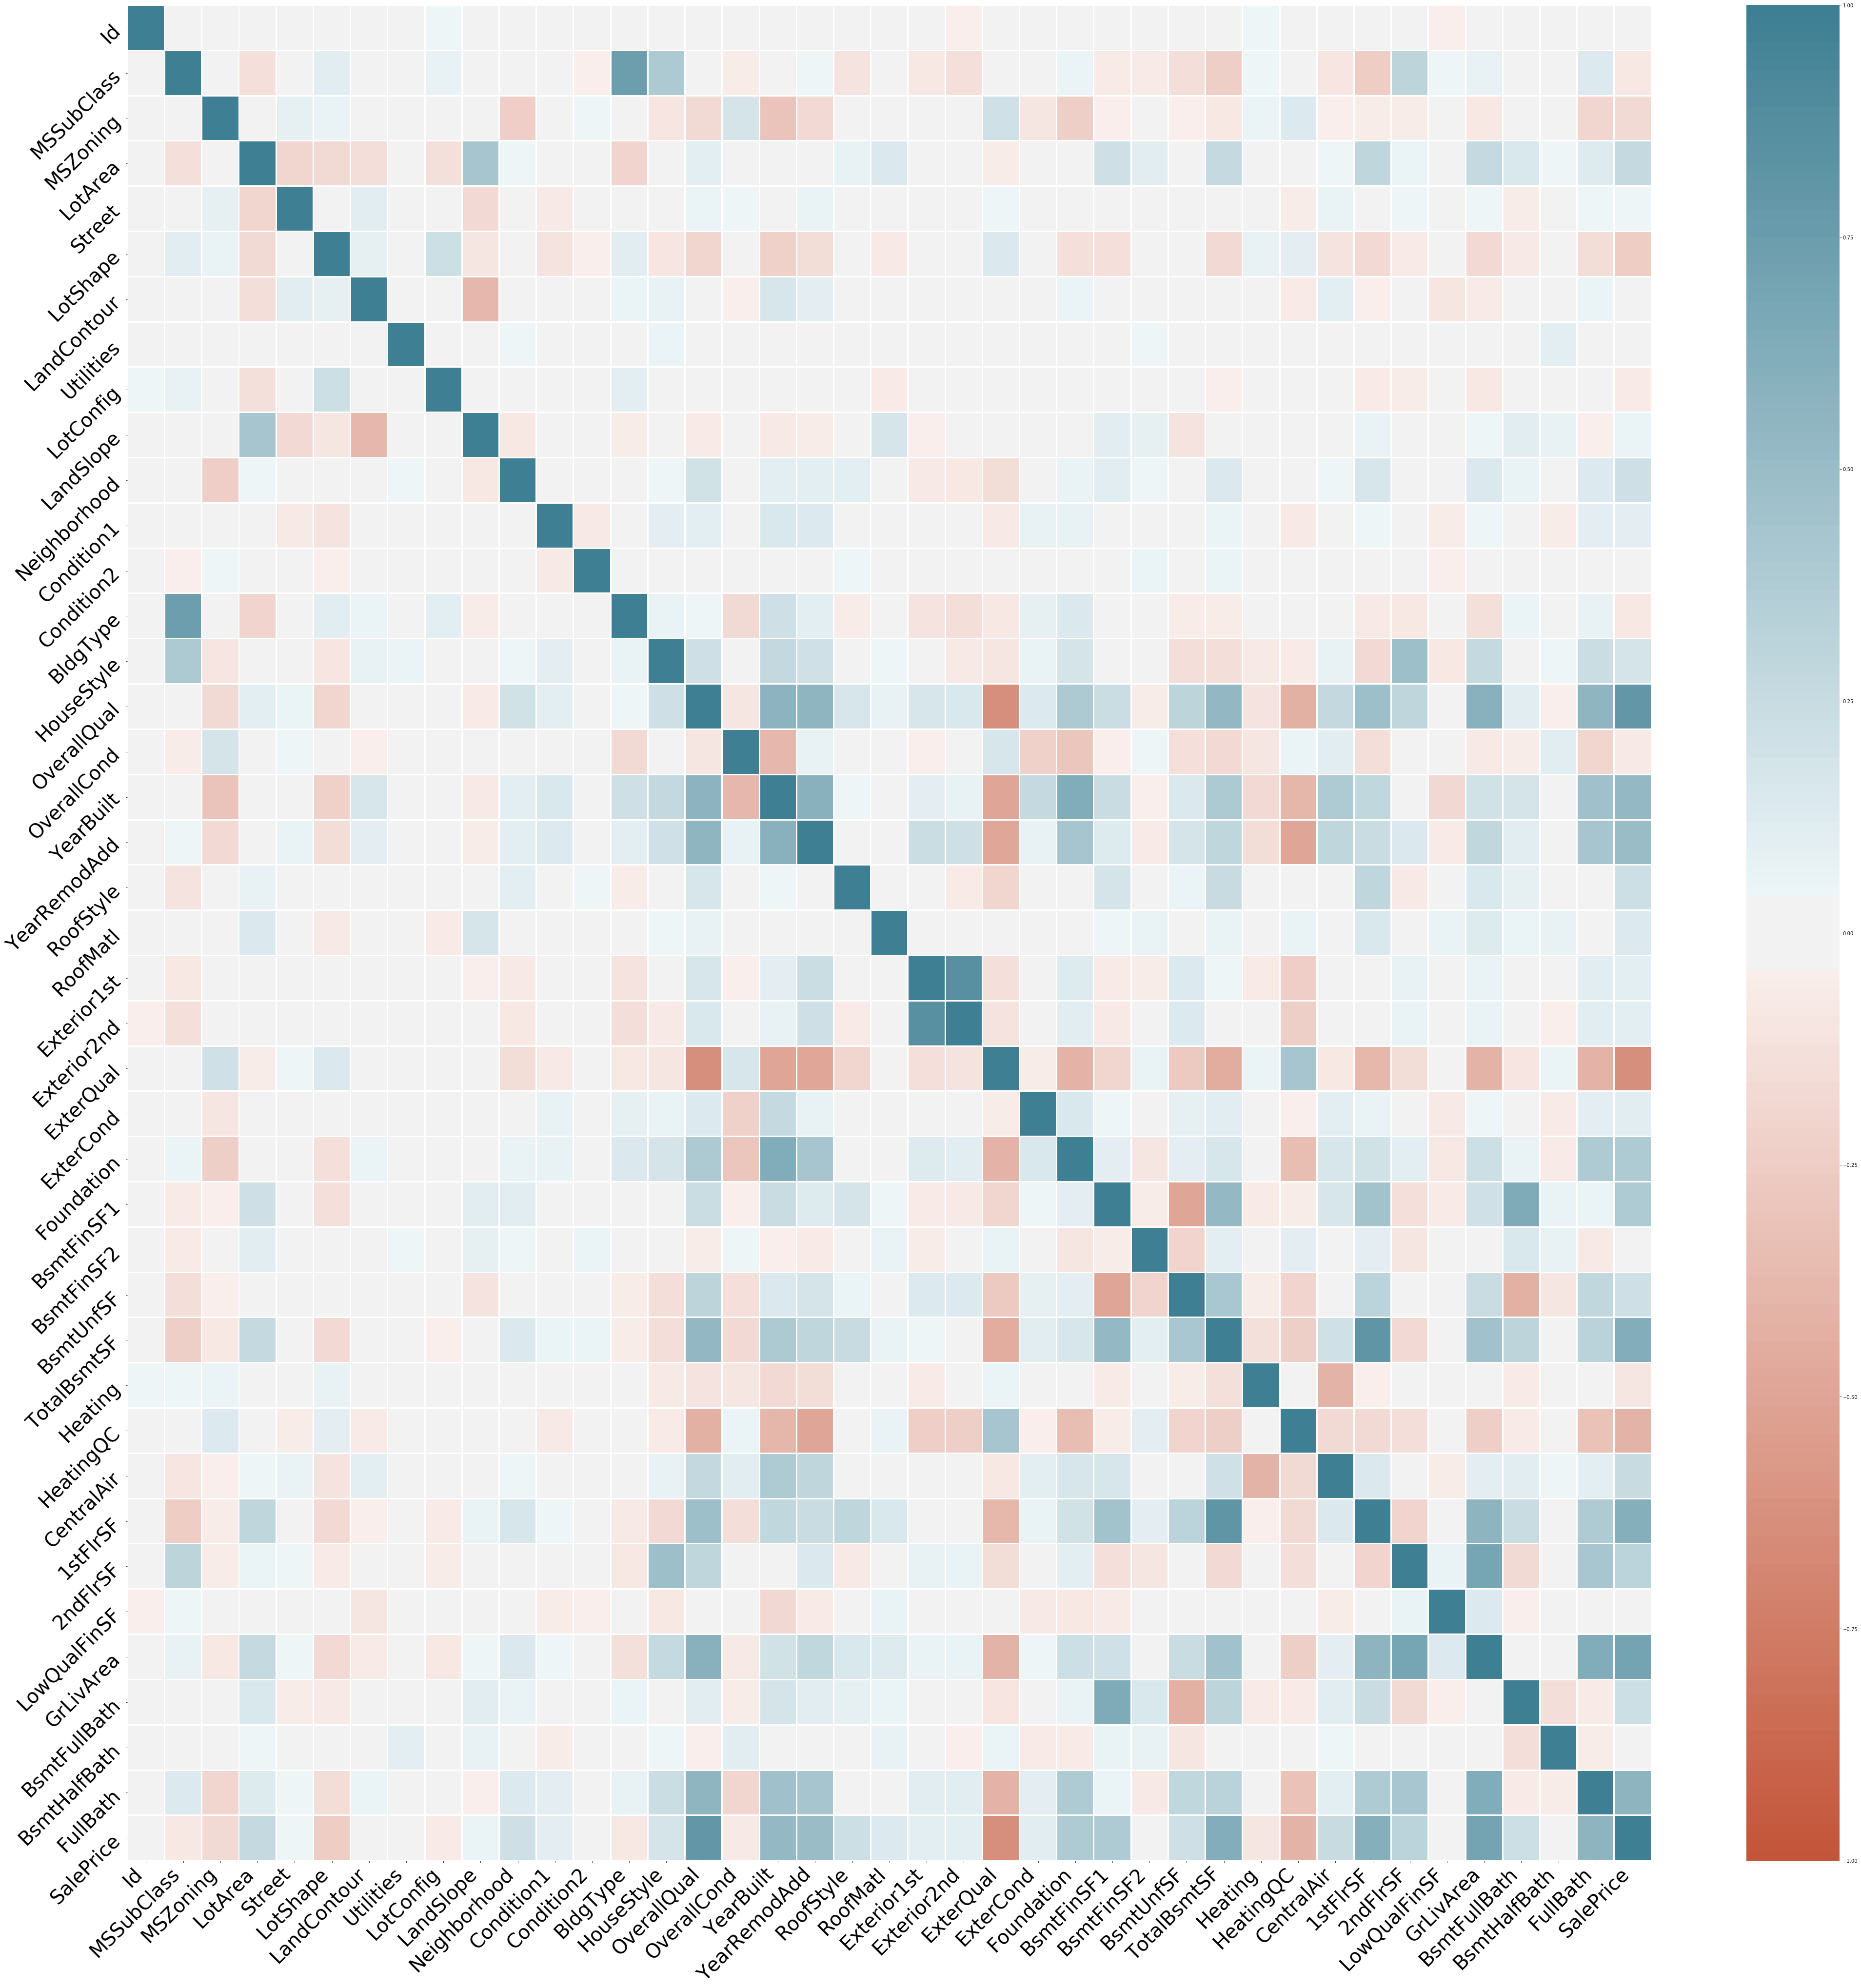

In [194]:
plt.figure(figsize = (70,70))
corr1 = temp_df.corr()

ax = sns.heatmap(
    corr1, 
    vmin=-1, vmax=1,
    cmap=sns.diverging_palette(20, 220, n=200),linewidth=2
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',size=40
);

ax.set_yticklabels( ax.get_yticklabels(),size=(40), rotation=45,);

In [195]:
corr_heatmap1=corr1.loc[:,['SalePrice']].sort_values(by='SalePrice',ascending=False)*100 
corr_heatmap1=corr_heatmap1[corr_heatmap1['SalePrice']>10]
corr_heatmap1

,SalePrice
SalePrice,100.000000
OverallQual,79.098160
GrLivArea,70.862448
TotalBsmtSF,61.358055
1stFlrSF,60.585218
FullBath,56.066376
YearBuilt,52.289733
YearRemodAdd,50.710097
BsmtFinSF1,38.641981
Foundation,38.247899


In [196]:
corr_heatmap1.shape

(22, 1)

In [197]:
corr1_columns=(corr_heatmap1.index.tolist()[1:])
len(corr1_columns)

21

In [198]:
# Plotting 41 till last columns
temp_df=x.iloc[:,41:]
temp_df=pd.concat([temp_df,y], axis=1, sort=False)
temp_df

,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,...,GarageType,BsmtExposure,GarageYrBlt,LotFrontage,GarageQual,Electrical,BsmtFinType2,BsmtCond,GarageCond,SalePrice
0,3,1,2,8,6,0,2,548,2,0,...,1,3,2003.0,65.0,4,4,5,3,4,208500
1,3,1,3,6,6,1,2,460,2,298,...,1,1,1976.0,80.0,4,4,5,3,4,181500
2,3,1,2,6,6,1,2,608,2,0,...,1,2,2001.0,68.0,4,4,5,3,4,223500
3,3,1,2,7,6,1,3,642,2,0,...,5,3,1998.0,60.0,4,4,5,1,4,140000
4,4,1,2,9,6,1,3,836,2,192,...,1,0,2000.0,84.0,4,4,5,3,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,7,6,1,2,460,2,0,...,1,3,1999.0,62.0,4,4,5,3,4,175000
1456,3,1,3,7,2,2,2,500,2,349,...,1,3,1978.0,85.0,4,4,4,3,4,210000
1457,4,1,2,9,6,2,1,252,2,0,...,1,3,1941.0,66.0,4,4,5,1,4,266500
1458,2,1,2,5,6,0,1,240,2,366,...,1,2,1950.0,68.0,4,0,4,3,4,142125


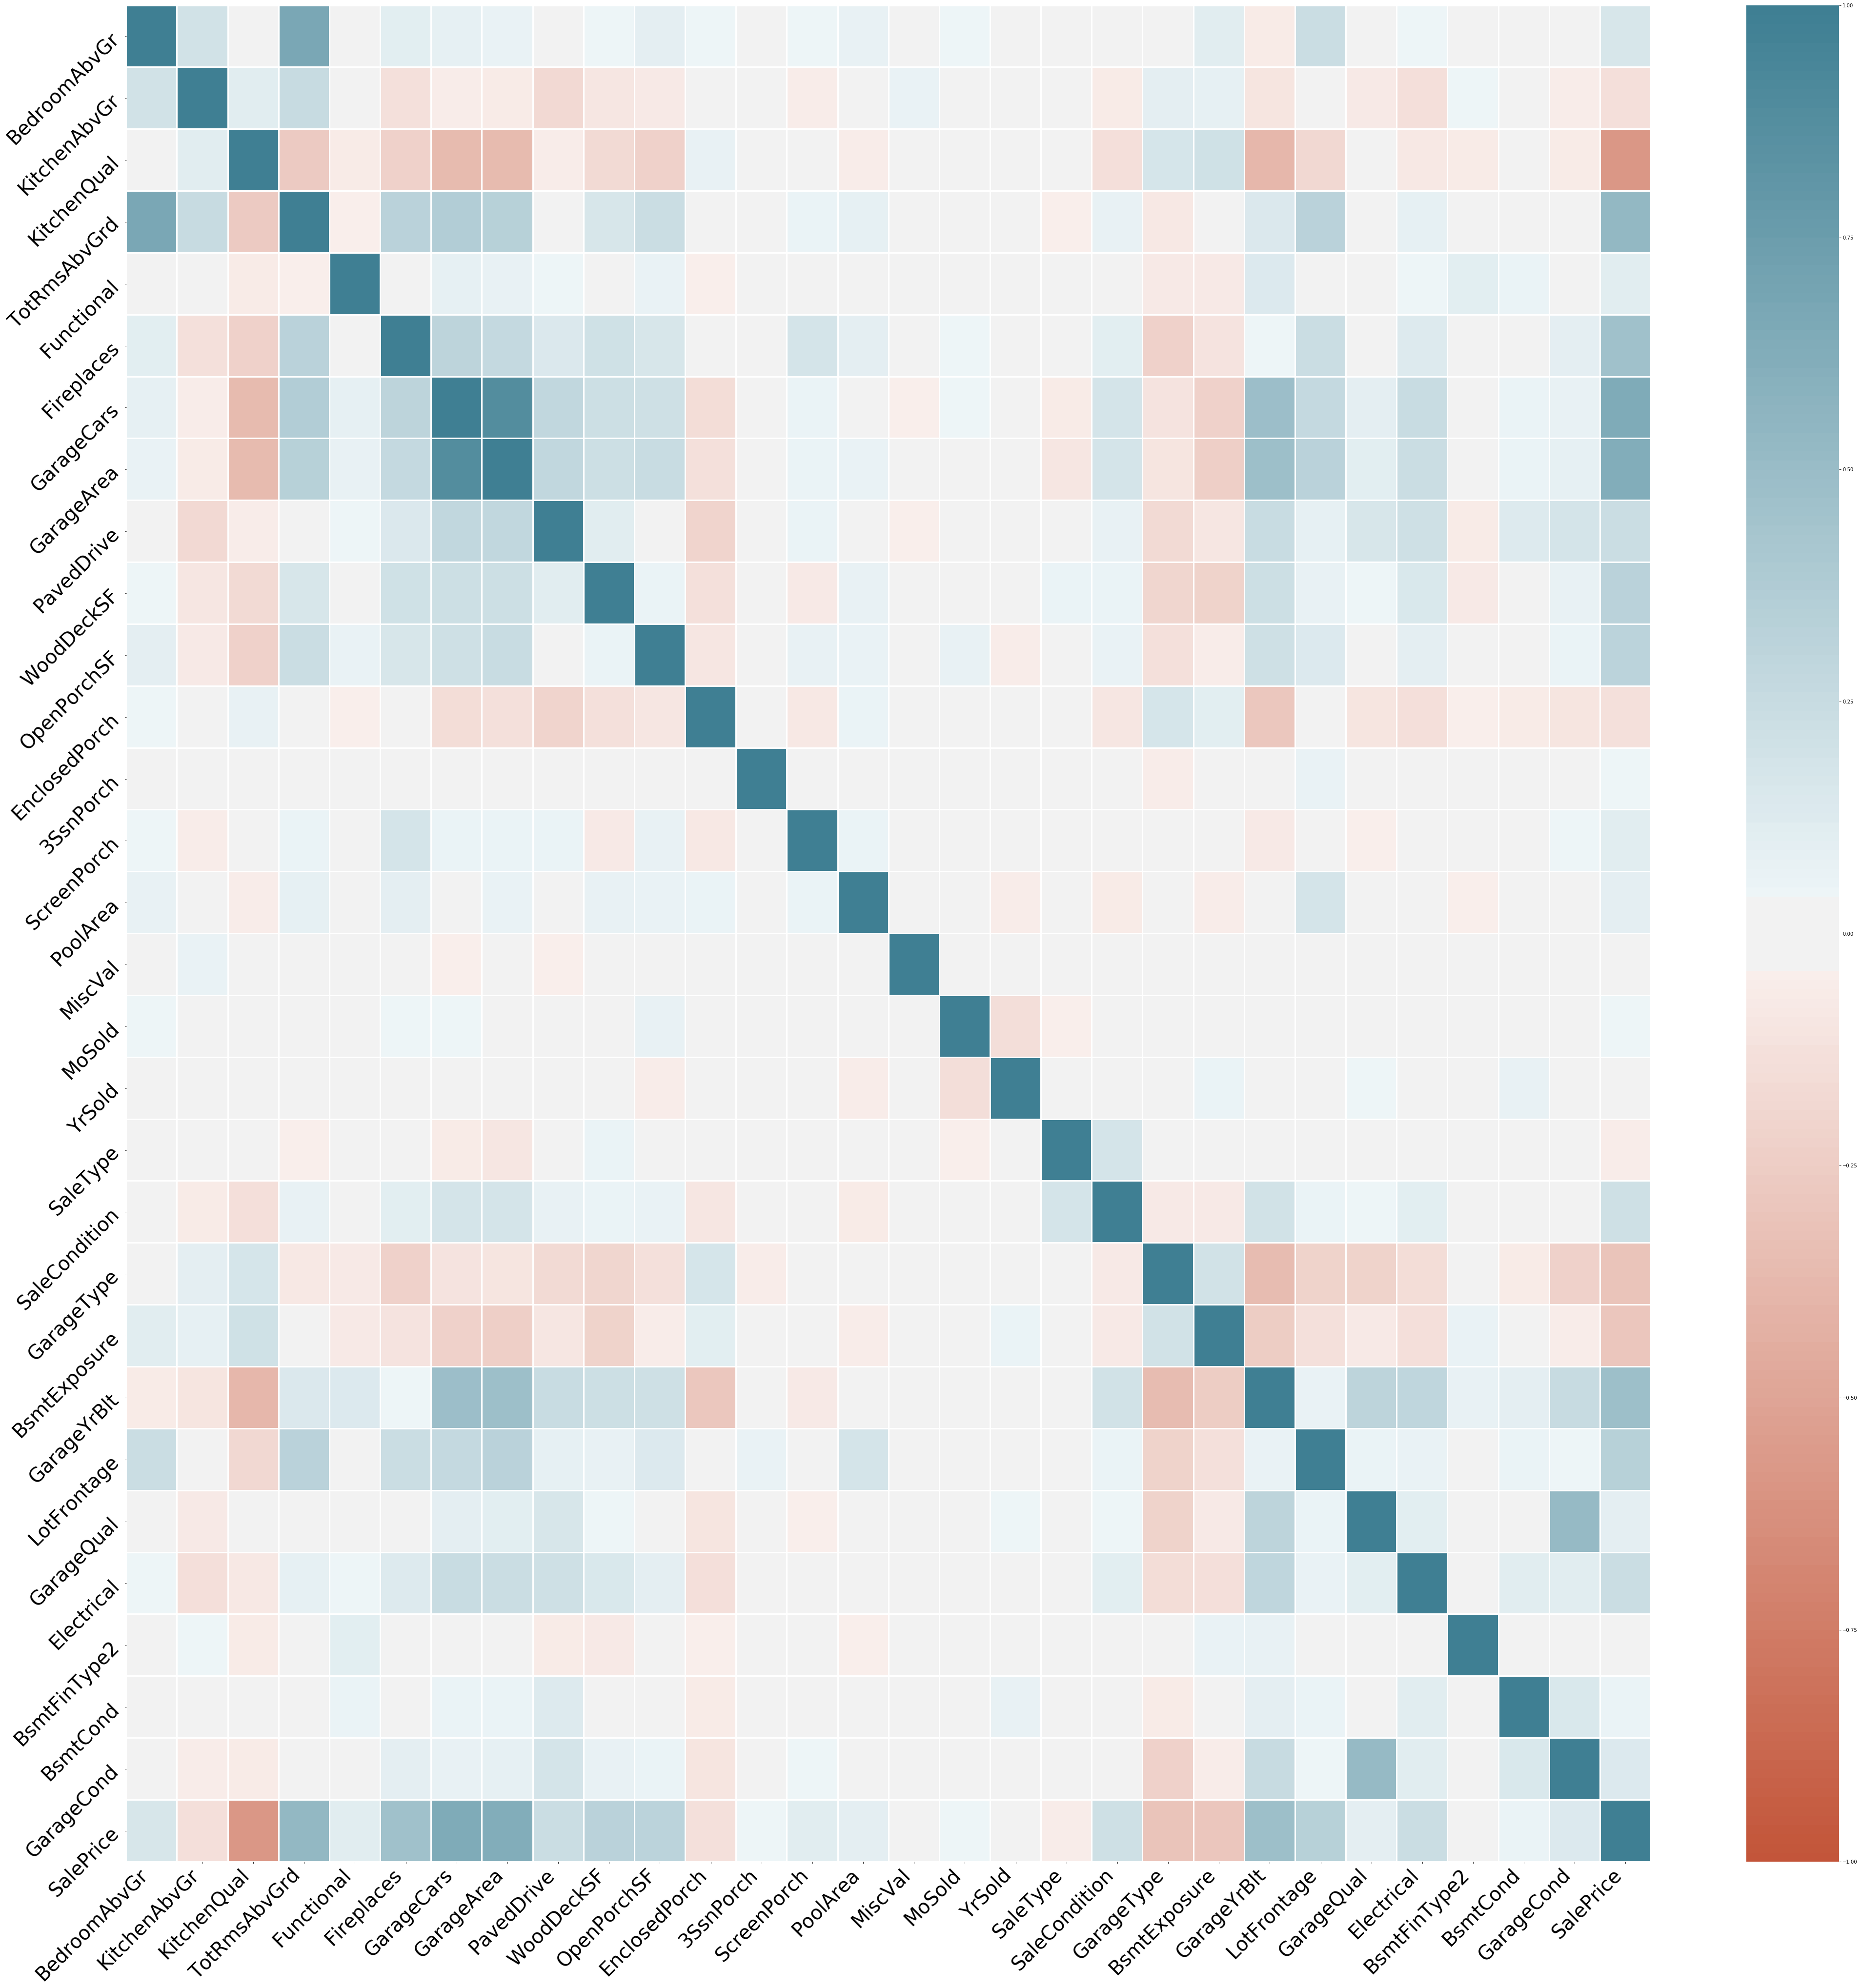

In [199]:
plt.figure(figsize = (70,70))
corr2 = temp_df.corr()

ax = sns.heatmap(
    corr2, 
    vmin=-1, vmax=1,
    cmap=sns.diverging_palette(20, 220, n=200),linewidth=2
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',size=40
);

ax.set_yticklabels( ax.get_yticklabels(),size=(40), rotation=45,);

In [200]:
corr_heatmap2=corr2.loc[:,['SalePrice']].sort_values(by='SalePrice',ascending=False)*100 
corr_heatmap2=corr_heatmap2[corr_heatmap2['SalePrice']>10]
corr_heatmap2

,SalePrice
SalePrice,100.000000
GarageCars,64.040920
GarageArea,62.343144
TotRmsAbvGrd,53.372316
GarageYrBlt,47.017745
Fireplaces,46.692884
LotFrontage,33.490085
WoodDeckSF,32.441344
OpenPorchSF,31.585623
Electrical,23.494494


In [201]:
len(corr_heatmap2.index)

16

In [202]:
corr2_columns=(corr_heatmap2.index.tolist()[1:])
len(corr2_columns)


15

In [203]:
columns_from_heatmap=corr1_columns+corr2_columns
columns_from_heatmap,len(columns_from_heatmap)

(['OverallQual',
  'GrLivArea',
  'TotalBsmtSF',
  '1stFlrSF',
  'FullBath',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'Foundation',
  '2ndFlrSF',
  'LotArea',
  'CentralAir',
  'BsmtFullBath',
  'RoofStyle',
  'BsmtUnfSF',
  'Neighborhood',
  'HouseStyle',
  'RoofMatl',
  'ExterCond',
  'Exterior2nd',
  'Exterior1st',
  'GarageCars',
  'GarageArea',
  'TotRmsAbvGrd',
  'GarageYrBlt',
  'Fireplaces',
  'LotFrontage',
  'WoodDeckSF',
  'OpenPorchSF',
  'Electrical',
  'PavedDrive',
  'SaleCondition',
  'BedroomAbvGr',
  'GarageCond',
  'Functional',
  'ScreenPorch'],
 36)

In [204]:
x_heatmap=x.loc[:,columns_from_heatmap]
# x1.insert(0, "Id", x.iloc[:,0:1], True) 
x_heatmap

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,BsmtFinSF1,Foundation,2ndFlrSF,...,LotFrontage,WoodDeckSF,OpenPorchSF,Electrical,PavedDrive,SaleCondition,BedroomAbvGr,GarageCond,Functional,ScreenPorch
0,7,1710,856,856,2,2003,2003,706,2,854,...,65.0,0,61,4,2,4,3,4,6,0
1,6,1262,1262,1262,2,1976,1976,978,1,0,...,80.0,298,0,4,2,4,3,4,6,0
2,7,1786,920,920,2,2001,2002,486,2,866,...,68.0,0,42,4,2,4,3,4,6,0
3,7,1717,756,961,1,1915,1970,216,0,756,...,60.0,0,35,4,2,0,3,4,6,0
4,8,2198,1145,1145,2,2000,2000,655,2,1053,...,84.0,192,84,4,2,4,4,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953,953,2,1999,2000,0,2,694,...,62.0,0,40,4,2,4,3,4,6,0
1456,6,2073,1542,2073,2,1978,1988,790,1,0,...,85.0,349,0,4,2,4,3,4,2,0
1457,7,2340,1152,1188,2,1941,2006,275,4,1152,...,66.0,0,60,4,2,4,4,4,6,0
1458,5,1078,1078,1078,1,1950,1996,49,1,0,...,68.0,366,0,0,2,4,2,4,6,0


In [205]:

c_test_heatmap=c_test.loc[:,columns_from_heatmap]
# c1_test.insert(0, "Id", c_test.iloc[:,0:1], True) 
c_test_heatmap

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,BsmtFinSF1,Foundation,2ndFlrSF,...,LotFrontage,WoodDeckSF,OpenPorchSF,Electrical,PavedDrive,SaleCondition,BedroomAbvGr,GarageCond,Functional,ScreenPorch
0,5,896,882.0,896,1,1961,1961,468.0,1,0,...,80.0,140,0,4,2,4,2,4,6,120
1,6,1329,1329.0,1329,1,1958,1958,923.0,1,0,...,81.0,393,36,4,2,4,3,4,6,0
2,5,1629,928.0,928,2,1997,1998,791.0,2,701,...,74.0,212,34,4,2,4,3,4,6,0
3,6,1604,926.0,926,2,1998,1998,602.0,2,678,...,78.0,360,36,4,2,4,3,4,6,0
4,8,1280,1280.0,1280,2,1992,1992,263.0,2,0,...,43.0,0,82,4,2,4,2,4,6,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,546.0,546,1,1970,1970,0.0,1,546,...,21.0,0,0,4,2,4,3,4,6,0
1455,4,1092,546.0,546,1,1970,1970,252.0,1,546,...,21.0,0,24,4,2,0,3,4,6,0
1456,5,1224,1224.0,1224,1,1960,1996,1224.0,1,0,...,160.0,474,0,4,2,0,4,4,6,0
1457,5,970,912.0,970,1,1992,1992,337.0,2,0,...,62.0,80,32,4,2,4,3,4,6,0


In [206]:
columns_from_heatmap

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'Foundation',
 '2ndFlrSF',
 'LotArea',
 'CentralAir',
 'BsmtFullBath',
 'RoofStyle',
 'BsmtUnfSF',
 'Neighborhood',
 'HouseStyle',
 'RoofMatl',
 'ExterCond',
 'Exterior2nd',
 'Exterior1st',
 'GarageCars',
 'GarageArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'Fireplaces',
 'LotFrontage',
 'WoodDeckSF',
 'OpenPorchSF',
 'Electrical',
 'PavedDrive',
 'SaleCondition',
 'BedroomAbvGr',
 'GarageCond',
 'Functional',
 'ScreenPorch']

# **<u>3.Feature Importance</u>**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[3.34249171e-02 1.52504215e-02 9.58799102e-03 3.06271789e-02
 3.06681400e-04 1.56759933e-02 7.44747487e-03 2.06569061e-05
 1.69437439e-02 3.90324217e-03 2.43778198e-02 9.47844151e-03
 7.78303512e-04 7.39281298e-03 1.35209527e-02 2.22539155e-02
 1.71166468e-02 2.82025539e-02 2.78931596e-02 1.25846172e-02
 1.35109372e-03 2.00909186e-02 2.12776162e-02 9.01532144e-03
 8.12701316e-03 1.23991716e-02 2.83731007e-02 7.70018907e-03
 3.11509877e-02 3.05105496e-02 1.42715462e-03 1.59823885e-02
 3.41014253e-03 2.99888693e-02 1.84630576e-02 1.08829634e-03
 3.23434228e-02 1.50485229e-02 4.65002158e-03 9.93617318e-03
 1.08559240e-02 1.82288388e-02 2.14856349e-03 1.34324868e-02
 2.46205802e-02 5.03926898e-03 1.69790647e-02 1.38011137e-02
 3.05694678e-02 5.09426803e-03 2.31435559e-02 2.44483169e-02
 8.75630583e-03 1.97998657e-03 6.69963169e-03 3.34992533e-04
 3.01070449e-03 3.02296768e-02 2.79046515e-02 8.73658045e-03
 1.15445506e-02 1.32890537e-02 1.71312553e-02 2.81478223e-02
 2.87356066e-02 3.187177

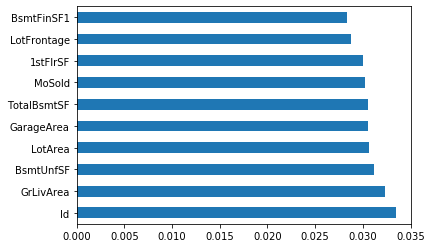

In [207]:
X = x  #independent columns

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [208]:
data = {'Specs':X.columns,
        'Score':model.feature_importances_}

In [209]:
data

{'Specs': Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
        'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
        'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
        'SaleCondition', 'GarageType', 'BsmtExposure', 'GarageYrBlt',
        'LotFront

In [210]:
feat_importance1 = pd.DataFrame(data)
feat_importance1

,Specs,Score
0,Id,0.033425
1,MSSubClass,0.015250
2,MSZoning,0.009588
3,LotArea,0.030627
4,Street,0.000307
...,...,...
65,GarageQual,0.003187
66,Electrical,0.005759
67,BsmtFinType2,0.007661
68,BsmtCond,0.006795


In [211]:
hi=feat_importance1.sort_values(by='Score',ascending=False).iloc[1:31,[0]]
# Taking from 1 to 31 as 1st one is 'Id' column. 
hi

,Specs
36,GrLivArea
28,BsmtUnfSF
3,LotArea
48,GarageArea
29,TotalBsmtSF
57,MoSold
33,1stFlrSF
64,LotFrontage
26,BsmtFinSF1
17,YearBuilt


In [212]:
hii=hi['Specs'].to_list()
feature_importance_columns=hii

x_feature_importance=x.loc[:,feature_importance_columns]

In [213]:
x_feature_importance

,GrLivArea,BsmtUnfSF,LotArea,GarageArea,TotalBsmtSF,MoSold,1stFlrSF,LotFrontage,BsmtFinSF1,YearBuilt,...,2ndFlrSF,BedroomAbvGr,BsmtExposure,OverallCond,Fireplaces,LotConfig,HeatingQC,LotShape,MSSubClass,BsmtFullBath
0,1710,150,8450,548,856,2,856,65.0,706,2003,...,854,3,3,5,0,4,0,3,60,1
1,1262,284,9600,460,1262,5,1262,80.0,978,1976,...,0,3,1,8,1,2,0,3,20,0
2,1786,434,11250,608,920,9,920,68.0,486,2001,...,866,3,2,5,1,4,0,0,60,1
3,1717,540,9550,642,756,2,961,60.0,216,1915,...,756,3,3,5,1,0,2,0,70,1
4,2198,490,14260,836,1145,12,1145,84.0,655,2000,...,1053,4,0,5,1,2,0,0,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,953,7917,460,953,8,953,62.0,0,1999,...,694,3,3,5,1,4,0,3,60,0
1456,2073,589,13175,500,1542,2,2073,85.0,790,1978,...,0,3,3,6,2,4,4,3,20,1
1457,2340,877,9042,252,1152,5,1188,66.0,275,1941,...,1152,4,3,9,2,4,0,3,70,0
1458,1078,0,9717,240,1078,4,1078,68.0,49,1950,...,0,2,2,6,0,4,2,3,20,1


In [214]:
c_test_feature_importance=c_test.loc[:,feature_importance_columns]
c_test_feature_importance

,GrLivArea,BsmtUnfSF,LotArea,GarageArea,TotalBsmtSF,MoSold,1stFlrSF,LotFrontage,BsmtFinSF1,YearBuilt,...,2ndFlrSF,BedroomAbvGr,BsmtExposure,OverallCond,Fireplaces,LotConfig,HeatingQC,LotShape,MSSubClass,BsmtFullBath
0,896,270.0,11622,730.0,882.0,6,896,80.0,468.0,1961,...,0,2,3,6,0,4,4,3,20,0.0
1,1329,406.0,14267,312.0,1329.0,6,1329,81.0,923.0,1958,...,0,3,3,6,0,0,4,0,20,0.0
2,1629,137.0,13830,482.0,928.0,3,928,74.0,791.0,1997,...,701,3,3,5,1,4,2,0,60,0.0
3,1604,324.0,9978,470.0,926.0,6,926,78.0,602.0,1998,...,678,3,3,6,1,4,0,0,60,0.0
4,1280,1017.0,5005,506.0,1280.0,1,1280,43.0,263.0,1992,...,0,2,3,5,0,4,0,0,120,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1092,546.0,1936,0.0,546.0,6,546,21.0,0.0,1970,...,546,3,3,7,0,4,2,3,160,0.0
1455,1092,294.0,1894,286.0,546.0,4,546,21.0,252.0,1970,...,546,3,3,5,0,4,4,3,160,0.0
1456,1224,0.0,20000,576.0,1224.0,9,1224,160.0,1224.0,1960,...,0,4,3,7,1,4,0,3,20,1.0
1457,970,575.0,10441,0.0,912.0,7,970,62.0,337.0,1992,...,0,3,0,5,0,4,4,3,85,0.0


In [215]:
feature_importance_columns

['GrLivArea',
 'BsmtUnfSF',
 'LotArea',
 'GarageArea',
 'TotalBsmtSF',
 'MoSold',
 '1stFlrSF',
 'LotFrontage',
 'BsmtFinSF1',
 'YearBuilt',
 'GarageYrBlt',
 'YrSold',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'OpenPorchSF',
 'Neighborhood',
 'WoodDeckSF',
 'OverallQual',
 'Exterior2nd',
 'Exterior1st',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'OverallCond',
 'Fireplaces',
 'LotConfig',
 'HeatingQC',
 'LotShape',
 'MSSubClass',
 'BsmtFullBath']

In [216]:
s1=set(hii_selectBestK)
s2=set(columns_from_heatmap)
s3=set(feature_importance_columns)

In [217]:
set1=s1.intersection(s1)
len(set1)

30

In [218]:
set2=s3.intersection(set1)
len(set2)

18

After running 3 different ways of feature selection, i get same columns in all 3 methods

# PCA: But applied for Unsupervised.

In [219]:
# from sklearn.decomposition import PCA

In [220]:
# pca = PCA(n_components = None)


In [221]:
# X_train = pca.fit_transform(x_heatmap)
# # X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_

In [222]:
# pca.explained_variance_ratio_.cumsum()

In [223]:
# features = range(pca.n_components_)
# plt.bar(features, pca.explained_variance_ratio_, color='black')
# plt.xlabel('PCA features')
# plt.ylabel('variance %')
# plt.xticks(features)

In [224]:
# With pca=2, it explains 99% variance

# One error according to me is label encoding too many columns.

# Train,test,split:-

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
xtrain,xtest,ytrain,ytest=train_test_split(x_heatmap,y,test_size=0.3,random_state=0)
# x1 for heatmap
# x_select_bestk for selectbest k
# x_feature_importance for feature importance

In [227]:
ytest

,SalePrice
529,200624
491,133000
459,110000
279,192000
655,88000
...,...
271,241500
445,127500
654,350000
1280,227000


# **<u>1.Random Forests</u>**

In [228]:
 from sklearn.ensemble import RandomForestRegressor

### Q)when to use only fit and fit_transform? Only fit used below?

In [229]:
reg=RandomForestRegressor(n_estimators=2000,random_state=0,max_depth=15)
reg.fit(xtrain,ytrain)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [230]:
randomForest_predict=reg.predict(xtest)

In [231]:
randomForest_predict

array([225721.2221978 , 143284.44016844, 118700.91742711, 221798.98018191,
        90339.21913434, 110695.11644468, 267633.78217488, 121538.38748269,
       585263.721     , 153127.39612125, 185829.68623262, 144341.74102465,
       221339.13681942, 127089.56531604, 127016.05864374, 145926.51004225,
       225532.89096405, 117182.20882748, 140189.66904668, 187581.02457143,
       134883.37756833, 145185.43351257, 108525.21625322, 166857.11304976,
       177415.12182706, 216656.2611315 , 171911.73466653,  83658.83256255,
       323674.3778697 , 119426.73701083, 141488.7233155 , 193550.50706663,
       139541.5051489 , 293870.39168866, 349824.47976667, 182485.16646309,
       280417.26554542, 125237.8603286 , 234743.45005425, 301485.14371429,
       203329.9224732 , 128322.79799826, 178116.89374401, 300793.52973016,
       331167.46533333, 146196.48545295, 124949.17470803, 125756.36251005,
       170957.81137564,  97754.08018711, 387961.94866667, 142920.57433675,
       167588.05401344,  

## K-fold cross validation

### Q)can k-fold cross validation be applied to regression

In [232]:
from sklearn.model_selection import cross_val_score/

SyntaxError: invalid syntax (<ipython-input-232-ce878a3abb98>, line 1)

In [ ]:
accuracies=cross_val_score(estimator=reg,X=xtrain,y=ytrain,cv=10)#Vector having accuracy computed by combinations of k models.Usually k=10 is taken

In [ ]:
accuracies.mean()*100


In [ ]:
accuracies.std()*100


In [ ]:
print(accuracies.mean()*100-accuracies.std()*100,
      accuracies.mean()*100+accuracies.std()*100)


## Grid Search

### Q)grid search for random forest regression/ types of hyperparameter tuning

#### Types of scoring in grid?

In [ ]:
(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters = [{'n_estimators': [1, 10, 100, 1000,2000], 'max_depth': [10,15,50,100]}]


In [ ]:

grid_search = GridSearchCV(estimator = reg,
                           param_grid = parameters,
                           scoring='neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)


In [ ]:

grid_search = grid_search.fit(xtrain, ytrain)


In [ ]:

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
best_parameters

# **<u>2.SVM</u>**

### Before applying SVR, Scaling needs to be done......
## Q) Various types of scalar are there. See which is best?

In [233]:
from sklearn.preprocessing import StandardScaler as SS

In [234]:
sc_x=SS()
sc_y=SS()


In [235]:
xtrain.iloc[:,:]


,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,BsmtFinSF1,Foundation,2ndFlrSF,...,LotFrontage,WoodDeckSF,OpenPorchSF,Electrical,PavedDrive,SaleCondition,BedroomAbvGr,GarageCond,Functional,ScreenPorch
64,7,2034,1057,1057,2,1997,1998,739,2,977,...,70.049958,576,36,4,2,4,3,4,6,0
682,6,1291,1291,1291,1,1996,1997,1003,2,0,...,70.049958,307,0,4,2,4,2,4,6,0
960,5,858,858,858,1,1958,2008,696,1,0,...,50.000000,117,0,4,2,4,2,4,6,0
1384,6,1258,560,698,1,1939,1950,204,0,560,...,60.000000,0,0,4,1,4,2,4,6,0
1100,2,438,290,438,1,1920,1950,290,1,0,...,60.000000,0,0,1,0,4,1,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,8,2365,1252,1268,2,1999,1999,1163,2,1097,...,82.000000,0,128,4,2,4,3,4,6,180
835,4,1067,1067,1067,2,1950,1995,442,1,0,...,60.000000,290,0,4,2,4,2,4,3,0
1216,6,1902,0,1318,2,1978,1978,0,3,584,...,68.000000,0,0,4,2,4,4,4,6,0
559,7,1557,1374,1557,2,2003,2004,0,2,0,...,70.049958,143,20,4,2,4,2,4,6,0


In [236]:
ytrain

,SalePrice
64,219500
682,173000
960,116500
1384,105000
1100,60000
...,...
763,337000
835,128000
1216,112000
559,234000


In [237]:
xtrain_SVR=sc_x.fit_transform(xtrain)
xtest_SVR=sc_x.transform(xtest)


In [238]:
ytrain_SVR=sc_y.fit_transform(ytrain)
ytest_SVR=sc_y.transform(ytest)

In [239]:
from sklearn.svm import SVR
SVR_regressor=SVR(kernel='rbf') #Usually experiment with rbf 1st
SVR_regressor.fit(xtrain_SVR,ytrain_SVR)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [240]:
SVR_regressor.predict(xtest_SVR)

array([ 2.11387229e-01, -5.20414862e-01, -7.43076365e-01,  3.90793145e-01,
       -1.12531465e+00, -8.49307392e-01,  8.67469826e-01, -6.25805449e-01,
        1.02716232e+00, -2.32404566e-01,  1.86895747e-01, -5.11056726e-01,
        5.62880334e-01, -7.24820663e-01, -6.12032440e-01, -5.30879574e-01,
        5.00071364e-01, -8.80170473e-01, -5.17402523e-01, -2.46311932e-01,
       -4.44983351e-01, -4.22566623e-01, -7.25725715e-01, -2.99130844e-01,
       -1.49678880e-02,  8.30479325e-02, -9.68534051e-02, -1.26034217e+00,
        1.82605497e+00, -9.33065894e-01, -6.08332954e-01,  2.49854448e-01,
       -3.98685546e-01,  1.69262193e+00,  1.96223219e+00,  1.66957298e-01,
        1.57385205e+00, -6.83914996e-01,  7.67906680e-01,  2.08071346e+00,
        4.44761973e-01, -6.72089980e-01,  1.08434382e-02,  1.79462760e+00,
        1.64192887e+00, -5.67741781e-01, -6.70196125e-01, -5.58117740e-01,
       -3.68887709e-02, -9.53966509e-01,  2.49255431e+00, -6.15487494e-01,
       -1.20168258e-01, -

In [241]:
SVR_xtest_prediction=sc_y.inverse_transform(SVR_regressor.predict(xtest_SVR))

In [242]:
SVR_xtest_prediction

array([197095.76941541, 139941.34113682, 122551.26934791, 211107.53939198,
        92698.10127167, 114254.52663892, 248336.43432802, 131710.23759663,
       260808.56789758, 162435.21483389, 195182.96175445, 140672.22031222,
       224547.70989115, 123977.05675727, 132785.92252428, 139124.03728243,
       219642.27059424, 111844.09114196, 140176.60760973, 161349.03654982,
       145832.61276661, 147583.38018469, 123906.37135613, 157223.830064  ,
       179417.22290131, 187072.35022525, 173021.88736782,  82152.32582308,
       323202.83122173, 107712.90929755, 133074.85581069, 200100.09522284,
       149448.51461332, 312781.58599595, 333838.39996415, 193625.75025246,
       303505.54706083, 127171.82757325, 240560.45948227, 343091.89770165,
       215322.55539939, 128095.37241771, 181433.11163515, 320748.3239698 ,
       308822.41035451, 136245.06441996, 128243.28430712, 136996.71101842,
       177705.1814262 , 106080.55163406, 375257.05375876, 132516.07958642,
       171200.97549941, 1

In [243]:
SVR_xtrain_prediction=sc_y.inverse_transform(SVR_regressor.predict(xtrain_SVR))

In [244]:
SVR_xtrain_prediction

array([233783.34211093, 180800.20078142, 108659.20238754, ...,
       119818.0780834 , 193490.5920623 , 209837.10706817])

In [245]:
ytest

,SalePrice
529,200624
491,133000
459,110000
279,192000
655,88000
...,...
271,241500
445,127500
654,350000
1280,227000


In [246]:
# 1. Accuracy of SVR-----submit only svr pred too
2. Which one is best
3. Viz both w.r.t. to real answer
4. Ensemble of both
5. see what weights is good
6. eval matrix

SyntaxError: invalid syntax (<ipython-input-246-4b66b2663c10>, line 2)

In [247]:
import matplotlib.pyplot as plt

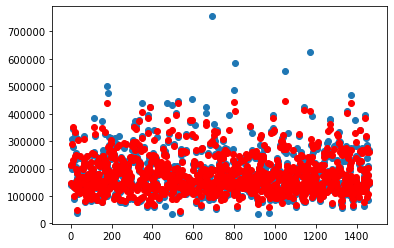

In [248]:
plt.scatter(xtrain.index[0:1000],ytrain[0:1000])
plt.scatter(xtrain.index[0:1000],SVR_xtrain_prediction[0:1000],color='red')
# plt.scatter(xtrain.index[0:1000],reg.predict(xtrain)[0:1000],color='y')

# ytest.plot(xtest.index,kind='scatter')

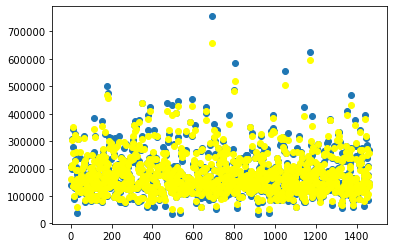

In [249]:
plt.scatter(xtrain.index[0:1000],ytrain[0:1000])
# plt.scatter(xtrain.index[0:100],SVR_xtrain_prediction[0:100],color='red')
plt.scatter(xtrain.index[0:1000],reg.predict(xtrain)[0:1000],color='yellow')

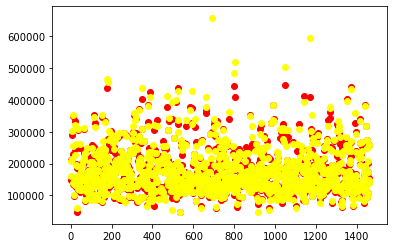

In [250]:
plt.scatter(xtrain.index[0:1000],SVR_xtrain_prediction[0:1000],color='red')
plt.scatter(xtrain.index[0:1000],reg.predict(xtrain)[0:1000],color='yellow')

In [251]:
len(ytest[ytest.SalePrice>350000])

18

### From viz. it seems svr performs better only for lower values. RF for both.
If value >350000 then use rf. See error for value less than this

In [252]:
ytest[ytest.SalePrice>350000].index #These values to be dropped from xtest

Int64Index([1182,  678,  231,  161,  688,  224,  278, 1228,   53,   58,  769,
             825,  644,  440,  481, 1243,  477,  898],
           dtype='int64')

In [253]:
ytest_lessThan350k=ytest[ytest.SalePrice<=350000]
ytest_lessThan350k

,SalePrice
529,200624
491,133000
459,110000
279,192000
655,88000
...,...
1247,169900
271,241500
445,127500
654,350000


In [254]:
list_greaterThan350k=(ytest[ytest.SalePrice>350000].index).values.tolist()#These values to be dropped from xtest

In [255]:
print(len(ytest_lessThan350k),len(list_greaterThan350k))

420 18


In [256]:
xtest.index.values.tolist()

[529,
 491,
 459,
 279,
 655,
 1013,
 1403,
 601,
 1182,
 687,
 1317,
 1003,
 1300,
 1392,
 1014,
 254,
 1322,
 89,
 31,
 482,
 142,
 811,
 52,
 857,
 1159,
 991,
 1358,
 649,
 724,
 575,
 728,
 846,
 360,
 4,
 678,
 558,
 34,
 1025,
 549,
 1105,
 175,
 54,
 401,
 1109,
 231,
 330,
 548,
 233,
 891,
 1049,
 161,
 486,
 1335,
 393,
 426,
 1340,
 740,
 737,
 979,
 107,
 615,
 1070,
 215,
 1290,
 667,
 1320,
 526,
 572,
 1274,
 822,
 315,
 9,
 1000,
 688,
 1122,
 866,
 1214,
 589,
 159,
 253,
 1129,
 879,
 535,
 1047,
 1173,
 958,
 1404,
 511,
 211,
 122,
 871,
 364,
 1084,
 1338,
 443,
 14,
 704,
 563,
 722,
 442,
 141,
 362,
 182,
 1073,
 353,
 85,
 5,
 896,
 965,
 1096,
 438,
 609,
 152,
 312,
 1265,
 962,
 224,
 1081,
 80,
 317,
 148,
 578,
 679,
 927,
 96,
 412,
 278,
 381,
 977,
 1055,
 420,
 1074,
 897,
 1429,
 1200,
 542,
 823,
 742,
 788,
 781,
 299,
 1452,
 113,
 1282,
 1163,
 310,
 930,
 656,
 45,
 1348,
 55,
 1228,
 963,
 921,
 458,
 1386,
 479,
 1244,
 613,
 1124,
 223,
 1233

In [257]:
count=0
indices_to_be_dropped=[]
for i in xtest.index.values.tolist():
    if i in list_greaterThan350k:
        print(count)
        indices_to_be_dropped.append(count)
    count+=1
print(indices_to_be_dropped)

8
34
44
50
73
116
126
151
214
253
258
264
265
288
340
355
370
437
[8, 34, 44, 50, 73, 116, 126, 151, 214, 253, 258, 264, 265, 288, 340, 355, 370, 437]


In [258]:
xtest_lessThan350k=xtest.drop(xtest.index[indices_to_be_dropped]) #Indices are dropped here

In [259]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytest_lessThan350k, reg.predict(xtest_lessThan350k)) #RF

553217261.5534208

In [260]:
mean_squared_error(ytest_lessThan350k, sc_y.inverse_transform(SVR_regressor.predict(xtest_lessThan350k)))

3934901507.941369

## SVR  perform poorly even for <=350k value of data. So no ensemble with it seems good.Still just experiment with 50% weights for value less than 350K.

### But lets try hyperprameter tuning.

### HyperParameter tuning of **SVR**

In [ ]:
SVR()
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters = [{'C': [1, 50,100], 'kernel': ['rbf'],'gamma':[0.1,0.01,0.001]},
             {'C': [1, 50,100], 'kernel': ['poly'],'degree':[1,2,3,4],'gamma':[0.1,0.01,0.001]},
             {'C': [1, 50,100], 'kernel': ['sigmoid'],'gamma':[0.1,0.01,0.001]}]

grid_search = GridSearchCV(estimator = SVR_regressor,
                           param_grid = parameters,
                           scoring='neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)



In [ ]:
grid_search = grid_search.fit(xtrain, ytrain)

In [ ]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print(best_accuracy, best_parameters)

# **<u>3. ANN</u>**

In [261]:
xtrain_ann,xtest_ann,ytrain_ann,ytest_ann=train_test_split(x_heatmap,df.iloc[:,-1],test_size=0.3,random_state=0)

In [286]:
# xtrain_ann=xtrain_ann.drop(columns='Id')
# xtrain_ann

# xtest_ann=xtest_ann.drop(columns='Id')
# xtest

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,BsmtFinSF1,Foundation,2ndFlrSF,...,LotFrontage,WoodDeckSF,OpenPorchSF,Electrical,PavedDrive,SaleCondition,BedroomAbvGr,GarageCond,Functional,ScreenPorch
529,6,2515,2035,2515,3,1957,1975,1219,2,0,...,70.049958,0,0,4,2,2,4,4,0,0
491,6,1578,806,958,1,1941,1950,403,1,620,...,79.000000,0,0,0,2,4,3,4,6,0
459,5,1203,709,979,1,1950,1950,185,1,224,...,70.049958,0,0,4,2,4,3,4,6,0
279,7,2022,1160,1156,2,1977,1977,392,1,866,...,83.000000,288,117,4,2,4,4,4,6,0
655,6,1092,525,525,1,1971,1971,0,1,567,...,21.000000,0,0,4,2,3,3,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,7,1363,1385,1363,1,1954,2005,226,1,0,...,73.000000,81,0,4,2,4,2,4,4,0
445,6,1689,1436,1689,1,1956,1956,0,1,0,...,73.000000,0,0,4,2,4,3,4,6,0
654,8,2113,2109,2113,2,1995,1995,1696,2,0,...,91.000000,236,46,4,2,4,2,4,6,0
1280,7,1573,1573,1573,2,2002,2002,788,2,0,...,67.000000,0,72,4,2,4,3,4,6,0


In [263]:
import tensorflow as tf

In [264]:
tf.__version__

'2.1.0'

In [265]:
ann=tf.keras.models.Sequential() #Initialise the layer

In [266]:
ann.add(tf.keras.layers.Dense(units=69,activation='relu')) #1st Layer

In [267]:
ann.add(tf.keras.layers.Dense(units=69,activation='relu')) #2nd layer

In [268]:
ann.add(tf.keras.layers.Dense(units=1)) #O/P layer----No activation function for last layer of regression

In [269]:
ann.compile(optimizer='adam',loss='mean_squared_error')

In [270]:
ann.fit(xtrain_ann.values,ytrain_ann.values, batch_size=32, epochs=300)

Train on 1022 samples
Epoch 1/300
1022/1022 [==============================] - 1s 504us/sample - loss: 36801560555.9609
Epoch 2/300
1022/1022 [==============================] - 0s 48us/sample - loss: 30052907765.4795
Epoch 3/300
1022/1022 [==============================] - 0s 47us/sample - loss: 17432873276.6184
Epoch 4/300
1022/1022 [==============================] - 0s 48us/sample - loss: 9131895286.4814
Epoch 5/300
1022/1022 [==============================] - 0s 45us/sample - loss: 7489647778.8180
Epoch 6/300
1022/1022 [==============================] - 0s 45us/sample - loss: 6280078475.2720
Epoch 7/300
1022/1022 [==============================] - 0s 45us/sample - loss: 5465874576.7828
Epoch 8/300
1022/1022 [==============================] - 0s 47us/sample - loss: 4950898945.0020
Epoch 9/300
1022/1022 [==============================] - 0s 46us/sample - loss: 4437298556.9941
Epoch 10/300
1022/1022 [==============================] - 0s 45us/sample - loss: 4092037430.6067
Epoch 11/300


1022/1022 [==============================] - 0s 46us/sample - loss: 1682978947.8826
Epoch 86/300
1022/1022 [==============================] - 0s 46us/sample - loss: 1687024991.8121
Epoch 87/300
1022/1022 [==============================] - 0s 47us/sample - loss: 1685013324.6497
Epoch 88/300
1022/1022 [==============================] - 0s 46us/sample - loss: 1688301322.5205
Epoch 89/300
1022/1022 [==============================] - 0s 46us/sample - loss: 1692723838.7476
Epoch 90/300
1022/1022 [==============================] - 0s 47us/sample - loss: 1680051854.0274
Epoch 91/300
1022/1022 [==============================] - 0s 47us/sample - loss: 1700718964.4775
Epoch 92/300
1022/1022 [==============================] - 0s 48us/sample - loss: 1693154328.5479
Epoch 93/300
1022/1022 [==============================] - 0s 48us/sample - loss: 1732471706.8023
Epoch 94/300
1022/1022 [==============================] - 0s 46us/sample - loss: 1682668803.0059
Epoch 95/300
1022/1022 [===================

1022/1022 [==============================] - 0s 47us/sample - loss: 1616139155.0372
Epoch 169/300
1022/1022 [==============================] - 0s 46us/sample - loss: 1610626258.7867
Epoch 170/300
1022/1022 [==============================] - 0s 47us/sample - loss: 1626837985.6908
Epoch 171/300
1022/1022 [==============================] - 0s 50us/sample - loss: 1622794985.9569
Epoch 172/300
1022/1022 [==============================] - 0s 46us/sample - loss: 1629122846.0587
Epoch 173/300
1022/1022 [==============================] - 0s 47us/sample - loss: 1626252191.5616
Epoch 174/300
1022/1022 [==============================] - 0s 47us/sample - loss: 1610756501.5421
Epoch 175/300
1022/1022 [==============================] - 0s 48us/sample - loss: 1618394389.4795
Epoch 176/300
1022/1022 [==============================] - 0s 47us/sample - loss: 1616487637.4168
Epoch 177/300
1022/1022 [==============================] - 0s 46us/sample - loss: 1656878107.0528
Epoch 178/300
1022/1022 [=========

1022/1022 [==============================] - 0s 67us/sample - loss: 1553943954.7867
Epoch 252/300
1022/1022 [==============================] - 0s 52us/sample - loss: 1550554485.8552
Epoch 253/300
1022/1022 [==============================] - 0s 47us/sample - loss: 1552484109.0254
Epoch 254/300
1022/1022 [==============================] - 0s 48us/sample - loss: 1551361497.9256
Epoch 255/300
1022/1022 [==============================] - 0s 46us/sample - loss: 1547861365.9804
Epoch 256/300
1022/1022 [==============================] - 0s 45us/sample - loss: 1546048312.1096
Epoch 257/300
1022/1022 [==============================] - 0s 47us/sample - loss: 1581471793.9726
Epoch 258/300
1022/1022 [==============================] - 0s 47us/sample - loss: 1569991505.6595
Epoch 259/300
1022/1022 [==============================] - 0s 47us/sample - loss: 1555267212.7750
Epoch 260/300
1022/1022 [==============================] - 0s 47us/sample - loss: 1599156906.5832
Epoch 261/300
1022/1022 [=========

In [271]:
ypred_ann=ann.predict(xtest_ann)

In [348]:
ypred_ann.reshape(438,)

array([269274.1  , 142074.48 , 118720.69 , 232287.88 ,  98391.84 ,
       110535.53 , 233669.34 , 158305.89 , 535106.6  , 128807.74 ,
       179956.55 , 202721.3  , 204170.73 , 127381.28 , 124314.734,
       164525.39 , 207265.17 ,  96490.21 , 129428.61 , 152248.53 ,
       175874.12 , 126602.24 , 111636.45 , 137836.42 , 195729.86 ,
       183012.31 , 156387.58 ,  48302.285, 274526.72 , 136153.27 ,
       248477.06 , 182921.9  , 136764.81 , 279363.28 , 311447.84 ,
       164433.38 , 231714.34 , 113968.   , 231962.36 , 319781.38 ,
       217469.88 , 135348.53 , 146638.67 , 303321.25 , 338279.97 ,
       187974.62 , 131400.22 , 109345.26 , 171507.33 ,  65935.24 ,
       340327.5  , 150553.17 , 187875.28 ,  72329.555, 242529.31 ,
       112001.17 , 127344.85 , 214732.11 , 153493.14 ,  88007.93 ,
       145073.42 , 129570.43 , 142025.72 , 168293.48 , 228944.17 ,
       169752.55 , 117784.3  , 196205.08 , 147003.83 , 171761.14 ,
       157674.25 , 121766.125,  84213.2  , 203360.44 ,  95989.

In [341]:
xgboost.predict(xtest)[0]

197123.16

# Q)No preprocessing in ann?

# **<u>4. AdaBoost</u>**

In [272]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


In [273]:
adaboost=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=1000,learning_rate=0.1,random_state=20)

In [274]:
adaboost.fit(xtrain,ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [275]:
adaboost_xtest_prediction=adaboost.predict(xtest)

# **<u>5. Gradient Boost</u>**

In [276]:
from sklearn.ensemble import GradientBoostingRegressor


In [277]:
gradient= GradientBoostingRegressor(n_estimators=100)

In [278]:
gradient

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [279]:

gradient.fit(xtrain, ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [280]:
gradient_xtest_prediction=gradient.predict(xtest)

[Hyperparameter tuning of Gradient Boosting](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae)

# **<u>6. XgBoost</u>**

In [281]:
import xgboost as xgb


In [282]:
xgboost=xgb.XGBRegressor()

In [283]:
xgboost.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [284]:
xgboost_xtest_prediction=xgboost.predict(xtest)

# Ensemble- Blending

In [350]:
( 0.2* xgboost.predict(xtest)+ 0.5* reg.predict(xtest)+ 0.2* gradient.predict(xtest)+
    0.2* adaboost.predict(xtest)+0.2*ann.predict(xtest).reshape(438,)).shape

(438,)

In [352]:
xtest.shape[0]

438

In [365]:
def all_pred(xtest):
    r1=xtest.shape[0]
    return(
   0.3* xgboost.predict(xtest)+
    0.2* gradient.predict(xtest)+
    0.2* adaboost.predict(xtest)+
    0.2* reg.predict(xtest)+
    0.1*ann.predict(xtest).reshape(r1,))
    

In [366]:
blend=all_pred(xtest)

In [367]:
blend.shape

(438,)

# <u>**Teaser:- Hyperparam of XgBoost gave me Best place on leaderboard**

### Hyperparam of XgBoost

# Q)RandmoizedSearchCV vs GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params=[{'learning_rate':[0.1,0.5,1],
         'gamma':[0.1,0.5,1],
         'n_estimator':[10,50,100],
         'max_depth':[2,6,8,12],
         'min_child_weight':[1,3,5,7]}]

In [ ]:
grid_search = GridSearchCV(estimator = xgboost,
                           param_grid = params,
                           scoring='neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)


In [ ]:
grid_search = grid_search.fit(xtrain, ytrain)


In [ ]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print(best_accuracy,best_parameters)

In [291]:
xgboost=xgb.XGBRegressor(gamma= 0.1, learning_rate=0.1, max_depth= 6, min_child_weight= 3, n_estimator= 10)

In [292]:
xgboost.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimator=10, n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [301]:
xgboost_xtest_prediction=xgboost.predict(xtest)
xgboost_xtest_prediction.shape

(438,)

# Vizualation after performing algos.

### Q) Ways to evaluate a model

In [298]:
from sklearn.metrics import mean_absolute_error


In [368]:
mean_absolute_error(ytest,blend)

16244.41804124448

In [369]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, blend)

780728134.6189693

In [ ]:
90,58,03,841
1,46,62,19,706
71,08,80,528
73,49,95,111
2,45,30,67,944
74,86,54,667
71,77,82,987

# Evaluation:
1. All 70 columns after pre-processing:
    a. n-estimator=1000
        1. Absolute-ERROR:- 16,989 
        2. MSE:- 87,41,82,817
     ## Leaderboard RMSE:-0.47

# <u> Heatmap:- </u>
2. Selecting 47 columns from heatmap using pearson correlation--- (columns with corr>0 taken only)
    a. n-estimator=1000
        1. Absolute-ERROR:- 17207 
        2. MSE:- 87,87,95,851
      ## Error actually increased on xtest data. But predictions on C_Test Data gave error as 0.1513
3. Selecting 47+'Id' columns from heatmap using pearson correlation
    a. n-estimator=1000
        1. Absolute-ERROR:- 17350 
        2. MSE:- 88,88,11,105     
4. Selecting 31 columns from heatmap using pearson correlation-- (columns with corr>40 taken only)  

       a. n-estimator=1000
            1. Absolute-ERROR:- 17112 
            2. MSE:- 85,35,55,830 
        
        
         b. n_estimators=10k  
      
            1. Absolute-ERROR:-17,102
            2. MSE:- 84,61,60,610
   
36 columns selected.n_estimators=2k, max_depth=15   
            1. Absolute-ERROR:-17,115   
            2. MSE:- 84,25,83,579

# SVR:
1. 36 features are selected
        1. Absolute-ERROR:- 18,740
        2. MSE:-1,46,62,19,706
        Absolute Error decreased , but MSE increased as compared to RandomForest


# Adaboost + D.T.:
1. 36 features are selected
        1. Absolute-ERROR:- 16,448
        2. MSE:-71,08,80,528
        Absolute Error decreased , but MSE increased as compared to RandomFore

# Testing on test data

In [322]:
(xgboost.predict(c_test_heatmap))

array([129262.41, 146425.08, 187289.77, ..., 172628.27, 111935.27,
       242852.55], dtype=float32)

In [323]:
xgboost_ypred=xgboost.predict(c_test_heatmap).astype(int)

In [358]:
all_pred(c_test_heatmap).astype(int)

array([132375, 156935, 187256, ..., 167757, 109537, 238808])

In [370]:
blend_final=all_pred(c_test_heatmap).astype(int)

## SVR

In [ ]:
sc_y.inverse_transform(SVR_regressor.predict(sc_x.transform(c_test_heatmap)))

In [ ]:
SVR_final_pred=sc_y.inverse_transform(SVR_regressor.predict(sc_x.transform(c_test_heatmap)))

## ANN

In [ ]:
ypred_ann_sub=ann.predict(c_test_heatmap)
ypred_ann_sub.shape

In [ ]:
asd=[]
for i in range(len(ypred_ann_sub)):
    asd.append(ypred_ann_sub[i][0])
# asd=(ypred_ann)


In [ ]:
asd

In [ ]:
dfd = pd.DataFrame(asd, columns = ['SalePrice'])
dfd


In [ ]:
p1=pd.DataFrame({'Id':c_test.Id.values})
p1

# DF for ANN

In [ ]:
p1=p1.join(dfd)
p1

# Submission file

In [371]:
p2= pd.DataFrame({'Id':c_test.Id.values,'SalePrice': blend_final})

In [361]:
p2

,Id,SalePrice
0,1461,132375
1,1462,156935
2,1463,187256
3,1464,186583
4,1465,192468
...,...,...
1454,2915,77577
1455,2916,85835
1456,2917,167757
1457,2918,109537


In [362]:
p2['SalePrice'].value_counts()

124483    2
127631    2
185760    2
139273    1
213652    1
         ..
134494    1
143254    1
85344     1
181601    1
112640    1
Name: SalePrice, Length: 1456, dtype: int64

In [373]:
p2.to_csv('house_blend_5_per.csv',index=False)

In [ ]:
# Even after trying 1000 trees instead of 100 trees, only 6 jump up in leaderboard. Hence i think, data cleaning is required more.

In [ ]:
# After few trys , i saw that taking very less fetures is results in bad score.

## I now want to drop similar columns by looking at the data.But unable to find intersection between columns.

In [ ]:
x["Condition1"].value_counts()
# 1260/1460= 86%

In [ ]:
x["Condition2"].value_counts()
# 1445/1460= 98%

In [ ]:
z=pd.DataFrame(x[['Condition1','Condition2']])
z

In [ ]:
# z['C'] = [(set(a) & set(b)) for a, b in zip(df.Condition1, df.Condition1) ]

In [ ]:
z

In [ ]:
x["Exterior1st"].value_counts()


In [ ]:
x["Exterior2nd"].value_counts()


Exterior1st and Exterior2nd columns seems almost same.Majority of them are same. But intersection should be same too.It may happen that different rows are same and not same rows.  

1. Feature Selection
2. Feature Scaling
3. Feature Engineering
4. Normization vs Standardization
5. Bell curves.
6. Probab. density function
7. z score for outliers.

# Learning from others kernels

In [ ]:
y.plot(kind='kde')

In [ ]:
y.plot(kind='hist')

In [ ]:
# sns.set_style("white") #Background color:- white, dark,etc.
# sns.set_color_codes(palette='deep') #Color user chooses
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(y, color="b");
# ax.grid(True)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
# sns.despine(trim=True, left=True) #Removes lines of boxes in which image is plotted
plt.show()

In [ ]:
# sns.set_style("white")
# sns.set_color_codes(palette='coolwarm')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(y);
# ax.grid(True)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

The data is right skewed. It may not affect tree-based models but then we can't use other models. Hence to make it normal distribution, we apply Log transformation.


In [ ]:
y.skew(), y.kurt()

# Questions:
1. deal with positively skewed data
2. handling bimodal distribution
3. kurtosis?- i think length of tail
4. https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16
5. 
6. **how does standard deviation affect data analysis?**
7. https://towardsdatascience.com/exploring-normal-distribution-with-jupyter-notebook-3645ec2d83f8
8. 

# Handling skewed data by applying log(x+1). +1 as,if zero present thrn error.

In [ ]:
y=np.log1p(y) #or np.log(y + 1) 

In [ ]:
from scipy.stats import norm #Ideal normal distribution curve

In [ ]:
sns.set_style("white")

f, ax = plt.subplots(figsize=(8, 7))

sns.distplot(y,fit=norm);
(mu, sigma) = norm.fit(y)
print(mu,sigma) #mu is mean
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

# how does standard deviation/sigma affect data analysis?

In [ ]:
y.describe()

In [ ]:
x['OverallQual'].plot(kind='hist')

In [ ]:
y.describe()

In [ ]:
df['SalePrice']

# These are Outliers

In [ ]:
x[(x['OverallQual']<5) & (df['SalePrice']>200000)].index

In [ ]:
x[(x['GrLivArea']>4500) & (df['SalePrice']>30000)].index

## Don;t know how to find outliers
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
See when to apply scatter( both continuous, or categorical?)
Seebox plots

In [ ]:
plt.scatter(x['OverallQual'],df['SalePrice'])

In [ ]:
plt.scatter(x['GrLivArea'],df['SalePrice'])
plt.scatter(x=4500, y=300000, color='r')
plt.scatter(x=4676, y=184750, color='y')
plt.scatter(x=5642, y=160000, color='g')


2 outliers.   
## coordinates of point on scatter plot seaborn?

In [ ]:
a=df[x['GrLivArea']>4500]
# a['GrLivArea']
a

# Missing value function

In [ ]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data)) #List of Columns of dataframe named 'data'
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)}) #Make dictionary of missing columns as key and percentage (upto 2 decimal places rounded up ) as value
    
    return dict_x

In [ ]:

missing = percent_missing(missing_df)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)# lambda x:x[1] i.e. sorting acc. to second parameter i.e. percentage of missing values
print('Percent of missing data')
df_miss

In [ ]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(missing_df.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.grid(True)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

Some of the non-numeric predictors are stored as numbers; convert them into strings 

In [ ]:
# df['MoSold']
# all_features['YrSold']
# all_features['MoSold']

In [ ]:
df['MSZoning'].mode()

In [ ]:
x['MSZoning'].plot(kind='hist')

In [ ]:
df['PoolQC'].value_counts()

In [ ]:
df[df['GarageCars']==0]

In [ ]:
(df[df['GarageYrBlt'].isnull()]).index

In [ ]:
(df[df['GarageArea']==0]).index

In [ ]:
df.loc[[39],["GarageYrBlt"]]

In [ ]:
# df[df['GarageYrBlt'].isnull()==True]

## GarageYrBlt column should be replaced by 0 not mean.

In [ ]:
df['GarageYrBlt'].mean()

In [ ]:
df.loc[:,['GarageQual', 'GarageCond']]

In [ ]:
# df['GarageQual'].value_counts()
(df[df['GarageQual'].isnull()]).index

In [ ]:
# df['GarageCond'].value_counts()
(df[df['GarageCond'].isnull()]).index

In [ ]:
df['GarageType'].value_counts()
(df[df['GarageType'].isnull()]).index

In [ ]:
df['GarageFinish'].value_counts()
(df[df['GarageFinish'].isnull()]).index

In [ ]:
df.loc[:,['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']]

In [ ]:
df['BsmtQual'].value_counts()
(df[df['BsmtQual'].isnull()]).index

In [ ]:
df['BsmtCond'].value_counts()
(df[df['BsmtCond'].isnull()]).index

In [ ]:
df['BsmtExposure'].value_counts()
(df[df['BsmtExposure'].isnull()]).index

In [ ]:
df['BsmtFinType1'].value_counts()
(df[df['BsmtFinType1'].isnull()]).index

In [ ]:
df['BsmtFinType2'].value_counts()
(df[df['BsmtFinType2'].isnull()]).index

In [ ]:
df.loc[:,['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

In [ ]:
def handle_missing(features):
#     # the data description states that NA refers to typical ('Typ') values
#     features['Functional'] = features['Functional'].fillna('Typ')
#     # Replace the missing values in each of the columns below with their mode
#     features['Electrical'] = features['Electrical'].fillna("SBrkr")
#     features['KitchenQual'] = features['KitchenQual'].fillna("TA")
#     features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
#     features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
#     features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
#     ---------->No logic

    # the data description stats that NA refers to "No Pool"-------------------------------->No logic
    features["PoolQC"] = features["PoolQC"].fillna("None")
    
  *  # Replacing the missing values with 0, since no garage (i.e. 'GarageArea'=0) = no cars in garage
# GarageYrBlt is missing for GarageArea=0.
#     for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
#         features[col] = features[col].fillna(0)
        
    # Replacing the missing values with None------------------------------------------------->No logic
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        features[col] = features[col].fillna('None')
        
    # NaN values for these categorical basement features, means there's no basement---------->No logic
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        features[col] = features[col].fillna('None')
        
    # Group the by neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood---------->No logic
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # We have no particular intuition around how to fill in the rest of the categorical features
    # So we replace their missing values with None
    objects = []
    for i in features.columns:
        if features[i].dtype == object:
            objects.append(i)
    features.update(features[objects].fillna('None'))
        
    # And we do the same thing for numerical features, but this time with 0s
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    features.update(features[numeric].fillna(0))    
    return features

all_features = handle_missing(all_features)

# Finding skewed columns

In [ ]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
        numeric.append(i)

In [ ]:
from scipy.stats import skew

In [ ]:
# Find skewed numerical features
skew_features = df[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

In [ ]:
len(numeric)
# numeric.remove('SalePrice')

In [ ]:
# df['Utilities'].plot(kind='box')
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log") #For scaling x-axis
ax = sns.boxplot(data=df[numeric] , orient="h", palette="Set1")
# ax.xaxis.grid(False)
# ax.set(ylabel="Feature names")
# ax.set(xlabel="Numeric values")
# ax.set(title="Numeric Distribution of Features")
# sns.despine(trim=True, left=True)

Boxplot:-   
https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

### Applying box--cox1 transformation:   
https://www.youtube.com/watch?v=2gVA3TudAXI   
https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0   
https://medium.com/@ronakchhatbar/box-cox-transformation-cba8263c5206

In [ ]:
from scipy.special import boxcox1p
for i in skew_index:
    missing_df[i] = boxcox1p(missing_df[i], boxcox_normmax(all_features[i] + 1))

again find skewness after transformation

In [ ]:
z=pd.DataFrame()

In [ ]:
z['BsmtFinType1_Unf'] = 1*(df['BsmtFinType1'] == 'Unf')

In [ ]:
df['BsmtFinType1']


In [ ]:
df['BsmtFinType1'].value_counts()

In [ ]:
df['BsmtFinType1']
z

In [ ]:
df['Street'].value_counts()

In [ ]:
df.loc[:,['OverallQual','OverallCond']]
# df['YearRemodAdd'].value_counts()

In [ ]:
df['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)

In [ ]:
df[df['TotalBsmtSF']<0]

In [ ]:
df['TotalBsmtSF']

In [ ]:
all_features['BsmtFinType1_Unf'] = 1*(all_features['BsmtFinType1'] == 'Unf')
all_features['HasWoodDeck'] = (all_features['WoodDeckSF'] == 0) * 1
all_features['HasOpenPorch'] = (all_features['OpenPorchSF'] == 0) * 1

all_features['HasEnclosedPorch'] = (all_features['EnclosedPorch'] == 0) * 1
all_features['Has3SsnPorch'] = (all_features['3SsnPorch'] == 0) * 1
all_features['HasScreenPorch'] = (all_features['ScreenPorch'] == 0) * 1

#******************************************#
all_features['YearsSinceRemodel'] = all_features['YrSold'].astype(int) - all_features['YearRemodAdd'].astype(int)
all_features['Total_Home_Quality'] = all_features['OverallQual'] + all_features['OverallCond']
all_features = all_features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)#Logical to drop as all same values in cols

all_features['TotalSF'] = all_features['TotalBsmtSF'] + all_features['1stFlrSF'] + all_features['2ndFlrSF']
all_features['YrBltAndRemod'] = all_features['YearBuilt'] + all_features['YearRemodAdd']

all_features['Total_sqr_footage'] = (all_features['BsmtFinSF1'] + all_features['BsmtFinSF2'] +
                                 all_features['1stFlrSF'] + all_features['2ndFlrSF']) # See 

all_features['Total_Bathrooms'] = (all_features['FullBath'] + (0.5 * all_features['HalfBath']) +
                               all_features['BsmtFullBath'] + (0.5 * all_features['BsmtHalfBath']))

all_features['Total_porch_sf'] = (all_features['OpenPorchSF'] + all_features['3SsnPorch'] +
                              all_features['EnclosedPorch'] + all_features['ScreenPorch'] +
                              all_features['WoodDeckSF'])
#****************************************#
# WTH IS THIS
all_features['TotalBsmtSF'] = all_features['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
all_features['2ndFlrSF'] = all_features['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
all_features['GarageArea'] = all_features['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
all_features['GarageCars'] = all_features['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
all_features['LotFrontage'] = all_features['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
all_features['MasVnrArea'] = all_features['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
all_features['BsmtFinSF1'] = all_features['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

all_features['haspool'] = all_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['has2ndfloor'] = all_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasgarage'] = all_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasbsmt'] = all_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasfireplace'] = all_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

### Again check skewness/ apply log, sq transformations...........see kernel

In [ ]:
df = pd.get_dummies(df).reset_index(drop=True)
df.shape


In [ ]:
df